**Student ID**: 22200374

**Student Name:** Ye Xing
    
**Student ID:** 21211802

**Student Name:** Yin Chen

In [1]:
import sys
#Import package 'requests'for URL scrapping
import requests
# Import package for reading csv files 
import pandas as pd
#import package 'beautifulsoup' to extract the content of HTML fields 
#pip install bs4
from bs4 import BeautifulSoup
#pip install newspaper3k
import newspaper
#import package 'feedparser'
#Feedparser is a library to parse RSS/XML feeds, these are files with a specific XML structure
import feedparser
#import package 'json' to parse json objects
import json
# Import package numpy for numeric computing
import numpy as np
# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
#For showing plots directly in the notebook run the command below
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
# hide ipykernel warnings 
import warnings
%matplotlib inline
import pydotplus

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

import warnings
warnings.filterwarnings('ignore')



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from patsy import dmatrices

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz

import graphviz
from graphviz import Source

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1.1  Data Understanding and Preparation

#### Combine 2 CSV Document
- We will do a lot of preparatory work in the first part, and reproduce some of the data cleaning steps of Homework1. In order to combine the features of the teacher's discussion in Bright Space with our personal findings.

In [2]:
#Combine 2 CSV document

# read the first csv
csv_file1 = 'covid19-cdc-22200374.csv'
data1 = pd.read_csv(csv_file1)

# read the second csv
csv_file2 = 'covid19-cdc-21211802.csv'
data2 = pd.read_csv(csv_file2)

combined_data = pd.concat([data1, data2], ignore_index=True)

output_file = 'covid19-cdc-22200374&21211802.csv'
combined_data.to_csv(output_file, index=False)

df = pd.read_csv('covid19-cdc-22200374&21211802.csv')

In [3]:
print("number of rows and columns(Rows_Num,Columns_Num):", df.shape)
print("number of rows:", df.shape[0])
print("number of columns:", df.shape[1])

number of rows and columns(Rows_Num,Columns_Num): (40000, 19)
number of rows: 40000
number of columns: 19


In [4]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate rows (excluding first) in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.

#print('Number of duplicate rows (including first) in the table is:', df.duplicated(keep=False).sum())
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate rows (excluding first) in the table is:  3622
Number of duplicate rows (including first) in the table is: 6131


#### Drop duplicated rows

In [5]:
df[df.duplicated(keep=False)].sort_values(["case_month","res_county"],ignore_index=True)#these two values as sort values
#Now, that shows you the duplicate rows clearly.

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-01,GA,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
1,2020-01,GA,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
2,2020-01,GA,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
3,2020-03,NJ,34.0,BERGEN,34003.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,NaN
4,2020-03,NJ,34.0,BERGEN,34003.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,2022-11,NJ,34.0,BERGEN,34003.0,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
6127,2022-11,NY,36.0,NASSAU,36059.0,18 to 49 years,Female,Unknown,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
6128,2022-11,NY,36.0,NASSAU,36059.0,18 to 49 years,Female,Unknown,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
6129,2022-11,NY,36.0,WESTCHESTER,36119.0,18 to 49 years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN


In [6]:
df = df.drop_duplicates()
#check duplicated column
dfT=df.T
#check result!!
# get duplicated row data. Just deleted the duplicated ones, and **keep** the **first original one**!!!!
print('Duplicate remaining rows(including first):', df[df.duplicated(keep=False)].shape[0])
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())

Duplicate remaining rows(including first): 0
Number of duplicate (excluding first) columns in the table is:  0


#### Decisions on continuous and categorical features

In [7]:
continuous_features = df[['case_positive_specimen_interval','case_onset_interval']].columns 

df['state_fips_code']=df['state_fips_code'].astype('object')
df['county_fips_code']=df['county_fips_code'].astype('object')
categorical_columns = df.select_dtypes(['object']).columns

for column in categorical_columns:
    df[column] = df[column].astype('category')  

#show the result
df.dtypes

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

#### Clean the data again

In [8]:
#"case_positive_specimen_interval"'s value should be positive.
df['case_positive_specimen_interval']=df['case_positive_specimen_interval'].abs()
test_1= df[['case_positive_specimen_interval']][df["case_positive_specimen_interval"]<0]
print("1.Number of rows failing the test: ", test_1.shape[0])


#"case_onset_interval"'s value should be positive.
df['case_onset_interval']=df['case_onset_interval'].abs()
test_2= df[['case_onset_interval']][df["case_onset_interval"]<0]
print("2.Number of rows failing the test: ", test_2.shape[0])


#They are symptomatic, but case_onset_interval is empty, and then they can be assigned some meaningful value.
df.loc[ (df["symptom_status"]=='Symptomatic') & (df["case_onset_interval"].isnull()),'case_onset_interval']=0
test_3= df.loc[ (df["symptom_status"]=='Symptomatic') & (df["case_onset_interval"].isnull()) ,:]
test_3=test_3[['case_onset_interval','symptom_status']]
print("3.Number of rows failing the test: ", test_3.shape[0])


#The patient is an asymptomatic infection, but has case_onset_interval, which feels contradictory.
#test_4= df.loc[ (df["symptom_status"]=='Asymptomatic') &( (df["case_onset_interval"]>=0) | (df["case_onset_interval"]<0)),:]
test_4= df.loc[ (df["symptom_status"]=='Asymptomatic') &( df["case_onset_interval"].notnull()),:]
test_4=test_4[['case_onset_interval','symptom_status']]
print("4.Number of rows failing the test: ", test_4.shape[0])


#The patient has not been to the hospital but went to the ICU, which feels like a contradictory case
test_5_1=df.loc[ (df["hosp_yn"]=='No') & (df["icu_yn"]=='Yes'),:].index
df=df.drop(test_5_1)
test_5_1=df.loc[ (df["hosp_yn"]=='No') & (df["icu_yn"]=='Yes'),:]
test_5_1=test_5_1[['hosp_yn','icu_yn']]
print("5.1.Number of rows failing the test: ", test_5_1.shape[0])


#For patients who have not been hospitalized, and they have not died, it can be inferred that their "icu_yn" value is not necessarily 'Missing', but 'No'.
df.loc[ (df["death_yn"]=='No')& (df["icu_yn"]=='Missing')&(df["hosp_yn"]=='No'),"icu_yn"]= 'No'
test_5_2=df.loc[ (df["death_yn"]=='No')& (df["icu_yn"]=='Missing')&(df["hosp_yn"]=='No'),:]
test_5_2=test_5_2[['death_yn','icu_yn','hosp_yn']]
print("5.2.Number of rows meeting the condition: ", test_5_2.shape[0])


#Patients who died were unlikely to be asymptomatic, when they are the laboratory-confirmed cases.
test_6=df.loc[(df["symptom_status"]=='Asymptomatic') & (df["death_yn"]=='Yes') & (df['current_status']=='Laboratory-confirmed case'),:].index
df=df.drop(test_6)
test_6=df.loc[ (df["symptom_status"]=='Asymptomatic') & (df["death_yn"]=='Yes') & (df['current_status']=='Laboratory-confirmed case'),:]
test_6=test_6[['symptom_status','death_yn','current_status']]
print("6.Number of rows failing the test: ", test_6.shape[0])


#They are confirmed, but case_positive_specimen_interval is empty, and then they can be assigned some meaningful value.
df.loc[ (df["case_positive_specimen_interval"].isnull()) & ( df['current_status']== 'Laboratory-confirmed case'),'case_positive_specimen_interval']=0
test_7= df.loc[ (df["case_positive_specimen_interval"].isnull()) & ( df['current_status']== 'Laboratory-confirmed case'),:]
test_7=test_7[['case_positive_specimen_interval','current_status']]
print("7.Number of rows failing the test: ", test_7.shape[0])


test_8_1= df.loc[ ( df['current_status']== 'Probable case') & ( (df['process']== 'Laboratory reported')|(df['process']== 'Autopsy')|(df['process']== 'Clinical evaluation')|(df['process']== 'Routine surveillance')|(df['process']== 'Routine physical examination')),:]
test_8_1=test_8_1[['current_status','process']]
print("8.1.Number of rows failing the test: ", test_8_1.shape[0])


# test_8_2= df.loc[ ( df['current_status']== 'Laboratory-confirmed case') & ( (df['process']== 'Laboratory reported')|(df['process']== 'Autopsy')|(df['process']== 'Clinical evaluation')|(df['process']== 'Routine surveillance')|(df['process']== 'Routine physical examination')),:]
# test_8_2=test_8_2[['current_status','process']]
# print("8.2.Number of rows failing the test: ", test_8_2.shape[0])


#Asymptomatic patients are unlikely to be admitted to the ICU for treatment. Because the patient was admitted to the ICU, there must have been life-threatening manifestations
test_9=df.loc[ (df["symptom_status"]=='Asymptomatic') & (df["icu_yn"]=='Yes'),:].index
df=df.drop(test_9)
test_9=df.loc[ (df["symptom_status"]=='Asymptomatic') & (df["icu_yn"]=='Yes'),:]
test_9=test_9[['symptom_status','icu_yn']]
print("9.Number of rows failing the test: ", test_9.shape[0])


#It is impossible for asymptomatic patients without underlying diseases to have been hospitalized for no reason.
test_10=df.loc[ (df["symptom_status"]=='Asymptomatic') & (df["hosp_yn"]=='Yes') & (df["underlying_conditions_yn"]=='No'),:]
test_10=test_10[['symptom_status','hosp_yn','underlying_conditions_yn']]
print("10.Number of rows failing the test: ", test_10.shape[0])


#Patients who are asymptomatic and have no underlying disease theoretically will not die. If death occurs, the data may be wrong.
test_11=df.loc[ (df["symptom_status"]=='Asymptomatic') & (df["death_yn"]=='Yes') & (df["underlying_conditions_yn"]=='No'),:]
test_11=test_11[['symptom_status','death_yn','underlying_conditions_yn']]
print("11.Number of rows failing the test: ", test_11.shape[0])


#People who died must have symptoms, so their  missing, unknown, or empty 'symptom_status' can be changed to 'Symptomatic'.
df.loc[ (df["symptom_status"]=='Missing') |(df["symptom_status"]=='Unknown')|(df["symptom_status"].isnull())& (df["death_yn"]=='Yes') ,"symptom_status"]='Symptomatic'
test_12=df.loc[ (df["symptom_status"]=='Missing') |(df["symptom_status"]=='Unknown')|(df["symptom_status"].isnull())& (df["death_yn"]=='Yes') ,:]
test_12=test_12[['symptom_status','death_yn']]
print("12.Number of rows failing the test: ", test_12.shape[0])


1.Number of rows failing the test:  0
2.Number of rows failing the test:  0
3.Number of rows failing the test:  0
4.Number of rows failing the test:  0
5.1.Number of rows failing the test:  0
5.2.Number of rows meeting the condition:  0
6.Number of rows failing the test:  0
7.Number of rows failing the test:  0
8.1.Number of rows failing the test:  0
9.Number of rows failing the test:  0
10.Number of rows failing the test:  0
11.Number of rows failing the test:  0
12.Number of rows failing the test:  0


#### Check for irregular cardinality & permitted values in categorical features.

In [9]:
# Check for irregular cardinality & permitted values in categorical features. 
print("Unique values for:")
for column in categorical_columns:
    print("\n" + column )
    print(pd.unique(df[column].ravel()))

Unique values for:

case_month
['2020-09', '2020-12', '2021-01', '2020-03', '2020-04', ..., '2022-10', '2022-03', '2020-01', '2022-11', '2020-02']
Length: 35
Categories (35, object): ['2020-01', '2020-02', '2020-03', '2020-04', ..., '2022-08', '2022-09', '2022-10', '2022-11']

res_state
['TX', 'CA', 'IL', 'IN', 'TN', ..., 'RI', 'GA', 'VT', 'VI', 'GU']
Length: 49
Categories (49, object): ['AK', 'AL', 'AR', 'AZ', ..., 'VT', 'WA', 'WI', 'WY']

state_fips_code
[48.0, 6.0, 17.0, 18.0, 47.0, ..., 44.0, 13.0, 50.0, 78.0, 66.0]
Length: 49
Categories (49, float64): [1.0, 2.0, 4.0, 5.0, ..., 56.0, 66.0, 72.0, 78.0]

res_county
['BEXAR', 'LOS ANGELES', 'MADISON', 'MARION', 'RUTHERFORD', ..., 'HOUGHTON', 'BARRON', 'POWHATAN', 'MONTEZUMA', 'KING GEORGE']
Length: 927
Categories (926, object): ['ABBEVILLE', 'ACCOMACK', 'ADA', 'ADAIR', ..., 'YELLOWSTONE', 'YOLO', 'YORK', 'YUMA']

county_fips_code
[48029.0, 6037.0, 17119.0, 18097.0, 47149.0, ..., 26061.0, 55005.0, 51145.0, 8083.0, 51099.0]
Length: 1324

#### Replace all 'missing' and NULL values with 'Unknown'

In [10]:
df['county_fips_code'].cat.add_categories(['Unknown'], inplace=True)
df.loc[ (df["county_fips_code"].isnull()),"county_fips_code"]= 'Unknown'

In [11]:
df['age_group'].cat.add_categories(['Unknown'], inplace=True)
#df["age_group"]==df["age_group"].replace('Missing','Unknown')
df.loc[ (df["age_group"].isnull()),"age_group"]= 'Unknown'
df.loc[ (df["age_group"]=='Missing'),"age_group"]= 'Unknown'
df["age_group"] = df["age_group"].cat.remove_categories('Missing')

In [12]:
df.loc[ (df["sex"].isnull()),"sex"]= 'Unknown'
df.loc[ (df["sex"]=='Missing'),"sex"]= 'Unknown'
df["sex"] = df["sex"].cat.remove_categories('Missing')

In [13]:
df.loc[ (df["race"].isnull()),"race"]= 'Unknown'
df.loc[ (df["race"]=='Missing'),"race"]= 'Unknown'
df["race"] = df["race"].cat.remove_categories('Missing')

In [14]:
df.loc[ (df["ethnicity"].isnull()),"ethnicity"]= 'Unknown'
df.loc[ (df["ethnicity"]=='Missing'),"ethnicity"]= 'Unknown'
df["ethnicity"] = df["ethnicity"].cat.remove_categories('Missing')

In [15]:
df.loc[ (df["symptom_status"]=='Missing'),"symptom_status"]= 'Unknown'
df["symptom_status"] = df["symptom_status"].cat.remove_categories('Missing')

In [16]:
df['current_status'].cat.add_categories(['Unknown'], inplace=True)
df.loc[ (df["current_status"].isnull()),"current_status"]= 'Unknown'
df.loc[ (df["current_status"]=='Missing'),"current_status"]= 'Unknown'

In [17]:
df.loc[ (df["hosp_yn"]=='Missing'),"hosp_yn"]= 'Unknown'
df["hosp_yn"] = df["hosp_yn"].cat.remove_categories('Missing')

In [18]:
df.loc[ (df["icu_yn"]=='Missing'),"icu_yn"]= 'Unknown'
df["icu_yn"] = df["icu_yn"].cat.remove_categories('Missing')

In [19]:
df['underlying_conditions_yn'].cat.add_categories(['Unknown'], inplace=True)
df.loc[ (df["underlying_conditions_yn"].isnull()),"underlying_conditions_yn"]= 'Unknown'
df.loc[ (df["underlying_conditions_yn"]=='Missing'),"underlying_conditions_yn"]= 'Unknown'

In [20]:
df=df.drop(columns='state_fips_code')
df=df.drop(columns='res_county')
df=df.drop(columns='process')
df=df.drop(columns='exposure_yn')

#### Generate new features such as seasons and regions according to the optimization features suggestions given by the teacher in BrightSpace

In [21]:
# create a new column
df['case_season']=df['case_month'].apply(lambda x: 'Spring' if x in ['2020-03','2020-04','2020-05','2021-03','2021-04','2021-05','2022-03','2022-04','2022-05']
                                         else 'Summer' if x in ['2020-06','2020-07','2020-08','2021-06','2021-07','2021-08','2022-06','2022-07','2022-08'] 
                                         else 'Autumn' if x in ['2020-09','2020-10','2021-09','2021-10','2022-09','2022-10']
                                         else 'Cold Winter' )
df['case_season'] = df['case_season'].astype('category')
# df['case_season'].value_counts().plot(kind='bar', figsize=(10,5),color='lightblue')
# plt.grid(b=True, which='major', color='pink', linestyle='-')
# plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

In [22]:
# create a new column
df['region']=df['res_state'].apply(lambda x: 'Midwest' if x in ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']
                                         else 'South' if x in ['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV'] 
                                         else 'West' if x in ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']
                                         else 'Northeast' )
df['region'] = df['region'].astype('category')
# df['region'].value_counts().plot(kind='bar', figsize=(10,5),color='lightblue')
# plt.grid(b=True, which='major', color='pink', linestyle='-')
# plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

In [23]:
# create a new column
# According to their GDP performance!! 
df['regional_affluence']=df['res_state'].apply(lambda x: 'Rich Region' if x in ['DC','MA','NY','CT','AK','ND','WY','DE','CA','WA']
                                         else 'Poor Region' if x in ['TN','LA','NM','OK','AR','KY','WV','MS','AL'] 
                                         else 'Normal Region'  )
df['regional_affluence'] = df['regional_affluence'].astype('category')
# df['regional_affluence'].value_counts().plot(kind='bar', figsize=(10,5),color='lightblue')
# plt.grid(b=True, which='major', color='pink', linestyle='-')
# plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

In [24]:
df['old_person'] = df['age_group'].apply(lambda x: 'Yes' if x in "65+ years" else 'No')
df['old_person'] = df['old_person'].astype('category')
#df["senior_yn"].value_counts().plot(kind='bar', figsize=(10,5))

In [25]:
print(df.columns)

Index(['case_month', 'res_state', 'county_fips_code', 'age_group', 'sex',
       'race', 'ethnicity', 'case_positive_specimen_interval',
       'case_onset_interval', 'current_status', 'symptom_status', 'hosp_yn',
       'icu_yn', 'death_yn', 'underlying_conditions_yn', 'case_season',
       'region', 'regional_affluence', 'old_person'],
      dtype='object')


In [26]:
df.isnull().sum()

case_month                             0
res_state                              0
county_fips_code                       0
age_group                              0
sex                                    0
race                                   0
ethnicity                              0
case_positive_specimen_interval     2524
case_onset_interval                18406
current_status                         0
symptom_status                         0
hosp_yn                                0
icu_yn                                 0
death_yn                               0
underlying_conditions_yn               0
case_season                            0
region                                 0
regional_affluence                     0
old_person                             0
dtype: int64

In [27]:
categorical_columns = df[['case_month','case_season','res_state','county_fips_code','age_group','sex','race','ethnicity','current_status','symptom_status','hosp_yn','icu_yn','death_yn','underlying_conditions_yn','old_person']].columns 

df[categorical_columns].describe().T

,count,unique,top,freq
case_month,36270,35,2022-01,4354
case_season,36270,4,Cold Winter,17904
res_state,36270,49,NY,3681
county_fips_code,36270,1324,Unknown,2239
age_group,36270,5,18 to 49 years,13863
sex,36270,3,Female,18126
race,36270,7,White,22515
ethnicity,36270,3,Non-Hispanic/Latino,21946
current_status,36270,2,Laboratory-confirmed case,30521
symptom_status,36270,2,Symptomatic,35783


In [28]:
df[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,33746.0,0.162775,1.809549,0.0,0.0,0.0,0.0,100.0
case_onset_interval,17864.0,0.138603,1.497742,0.0,0.0,0.0,0.0,66.0


In [29]:
# Write the cleaned dataframe to a csv file
df.to_csv('covid19-cdc-22200374&21211802-cleaned&updated.csv', index=False)

In [30]:
print("After cleaning, number of rows and columns(Rows_Num,Columns_Num):", df.shape)
print("After cleaning, number of rows:", df.shape[0])
print("After cleaning, number of columns:", df.shape[1])

After cleaning, number of rows and columns(Rows_Num,Columns_Num): (36270, 19)
After cleaning, number of rows: 36270
After cleaning, number of columns: 19


### Summary of data quality plan:


| Variable Names                     | Data Quality Issue            | Handling Strategy              |
|------------------------------------|-------------------------------|--------------------------------|
| case_positive_specimen_interval | Outliers               | Do Nothing                |
| case_positive_specimen_interval  | Negative Value   | Take its absolute value           |
| case_positive_specimen_interval  | When 'current_status' = 'Laboratory-confirmed case','case_positive_specimen_interval' = 'NaN'    | Replace missing values with median value 0          |
| case_onset_interval         | Outliers           | Do Nothing              |
| case_onset_interval      | Negative Value              | Take its absolute value  |
| case_onset_interval| When 'symptom_status' = 'Symptomatic',  'case_onset_interval' = 'NaN'| Replace missing values with median value 0  |
| case_month      | No data quality issues                     |Keep as is. Can be used to derive new features such as seasons|
| res_state      | No data quality issues                     | Keep as is.            |
| state_fips_code      | No data quality issues | Drop column as it is like a duplicate feature to res_state. For later readability, can keep a dictionary mapping state code to state name.  |
| res_county     | 'NaN' Value  |Drop column as it is like a duplicate feature to county_fips_code and it is not a unique identifier (eg county with same name in different states)|
| county_fips_code    | 'NaN' Value     | Replaced with 'Unknown'  |
| age_group       | 'NaN' Value and 'Missing' Value  | Replaced with 'Unknown', and take 'Unknown' values into account when analysing data|
| sex        | 'NaN' Value and 'Missing' Value     | Replaced with 'Unknown', and take 'Unknown' values into account when analysing data|
| race | 'NaN' Value and 'Missing' Value   | Replaced with 'Unknown', and take 'Unknown' values into account when analysing data |
| ethnicity   | 'NaN' Value and 'Missing' Value |Replaced with 'Unknown', and take 'Unknown' values into account when analysing data |
| process     | The missing rate is too high  |Drop column as this feature has little effect on target outcome and has most values missing.|
| exposure_yn   |The missing rate is too high |Drop column as this feature has little effect on target outcome and has most values missing.|
| current_status      | No data quality issues            | Keep as is     |
| symptom_status      | 'Missing' Value                | Replace with 'Unknown'    |
| symptom_status| When 'death_yn' = 'Yes', 'symptom_status' = 'NaN' or 'Missing' or 'Unknown'| Replace with 'Symptomatic'|
| hosp_yn       | 'Missing' Value     | Replace with 'Unknown'      |
| icu_yn      | 'Missing' Value          | Replace with 'Unknown'     |
| icu_yn   | When 'death_yn' = 'No' and 'hosp_yn'= 'No', 'icu_yn' = 'NaN' | Replace missing values with 'No' |
| underlying_conditions_yn | 'NaN' Value and 'Missing' Value  | Replaced with 'Unknown', and take 'Unknown' values into account when analysing data |
| death_yn     | No data quality issues   | Keep as is   |
| case_season    | No data quality issues   | New Feature based on case_month   |
| region    | No data quality issues   | New Feature based on res_state   |
| regional_affluence    | No data quality issues   | New Feature based on res_state   |
| old_person    | No data quality issues   | New Feature based on age  |

In [31]:
df_combined = pd.read_csv("covid19-cdc-22200374&21211802-cleaned&updated.csv")
df_combined.head(5)

,case_month,res_state,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,case_season,region,regional_affluence,old_person
0,2020-09,TX,48029.0,50 to 64 years,Female,White,Hispanic/Latino,0.0,NaN,Laboratory-confirmed case,Symptomatic,Yes,Unknown,Yes,Unknown,Autumn,Northeast,Normal Region,No
1,2020-12,CA,6037.0,65+ years,Male,White,Hispanic/Latino,0.0,NaN,Laboratory-confirmed case,Symptomatic,Yes,Yes,Yes,Unknown,Cold Winter,West,Rich Region,Yes
2,2021-01,IL,17119.0,65+ years,Male,White,Non-Hispanic/Latino,1.0,0.0,Laboratory-confirmed case,Symptomatic,Yes,Unknown,Yes,Unknown,Cold Winter,Midwest,Normal Region,Yes
3,2020-03,CA,6037.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,0.0,Laboratory-confirmed case,Symptomatic,Yes,Yes,Yes,Unknown,Spring,West,Rich Region,Yes
4,2020-04,IN,18097.0,65+ years,Female,Unknown,Unknown,0.0,NaN,Laboratory-confirmed case,Symptomatic,Unknown,Unknown,Yes,Unknown,Spring,Midwest,Normal Region,Yes


**After importing the cleaned csv, as a reminder we will check the shape, inspect the datatypes and check for any remaining null values**

In [32]:
df_combined.shape

(36270, 19)

In [33]:
# continuous_features = df_combined[['case_positive_specimen_interval','case_onset_interval']].columns 

# df_combined['county_fips_code']=df_combined['county_fips_code'].astype('object')
# categorical_columns = df_combined.select_dtypes(['object']).columns

# for column in categorical_columns:
#     df_combined[column] = df_combined[column].astype('category')  

#show the result
df_combined.dtypes

case_month                          object
res_state                           object
county_fips_code                    object
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
case_season                         object
region                              object
regional_affluence                  object
old_person                          object
dtype: object

In [34]:
df_combined.isna().sum()

case_month                             0
res_state                              0
county_fips_code                       0
age_group                              0
sex                                    0
race                                   0
ethnicity                              0
case_positive_specimen_interval     2524
case_onset_interval                18406
current_status                         0
symptom_status                         0
hosp_yn                                0
icu_yn                                 0
death_yn                               0
underlying_conditions_yn               0
case_season                            0
region                                 0
regional_affluence                     0
old_person                             0
dtype: int64

#### Convert datatypes for plotting later
We will now review the datatypes and convert if needed. This will help avoid plotting errors later in the notebook


In [35]:
print(df_combined['death_yn'].value_counts())

No     27830
Yes     8440
Name: death_yn, dtype: int64


In [36]:
# convert death_yn to 0,1
df_combined['death_yn'] = df_combined['death_yn'].map({'Yes': 1, 'No': 0})
df_combined['death_yn'] = df_combined['death_yn'].astype('int64')

In [37]:
# # convert sex to 0,1,2
# df_combined['sex'] = df_combined['sex'].map({'Unknown': 2,'Male': 1, 'Female': 0})
# df_combined['sex'] = df_combined['sex'].astype('int64')

In [38]:
# # convert age_group to 0,1,2,3,4
# df_combined['age_group'] = df_combined['age_group'].map({'0 - 17 years': 0, '18 to 49 years': 1, '50 to 64 years': 2, '65+ years': 3, 'Unknown': 4})
# df_combined['age_group'] = df_combined['age_group'].astype('int64')

In [39]:
# # convert race to 0,1,2,3,4,5,6
# df_combined['race'] = df_combined['race'].map({'American Indian/Alaska Native':0, 'Asian':1, 'Black':2, 'Multiple/Other':3, 'Native Hawaiian/Other Pacific Islander':4, 'White':5, 'Unknown':6})
# df_combined['race'] = df_combined['race'].astype('int64')

In [40]:
# # convert ethnicity to 0,1,2
# df_combined['ethnicity'] = df_combined['ethnicity'].map({'Hispanic/Latino':0, 'Non-Hispanic/Latino':1, 'Unknown':2})
# df_combined['ethnicity'] = df_combined['ethnicity'].astype('int64')

In [41]:
# # convert current_status   to 0,1,2
# df_combined['current_status'] = df_combined['current_status'].map({'Laboratory-confirmed case':0, 'Probable Case':1,'Unknown':2})
# df_combined['current_status'] = df_combined['current_status'].astype('int64')

In [42]:
# # convert symptom_status   to 0,1,2
# df_combined['symptom_status'] = df_combined['symptom_status'].map({'Symptomatic':0, 'Asymptomatic':1, 'Unknown':2})
# df_combined['symptom_status'] = df_combined['symptom_status'].astype('int64')

In [43]:
# # convert hosp_yn   to 0,1,2
# df_combined['hosp_yn'] = df_combined['hosp_yn'].map({'Unknown': 2,'Yes': 1, 'No': 0})
# df_combined['hosp_yn'] = df_combined['hosp_yn'].astype('int64')

In [44]:
# # convert icu_yn   to 0,1,2
# df_combined['icu_yn'] = df_combined['icu_yn'].map({'Unknown': 2,'Yes': 1, 'No': 0})
# df_combined['icu_yn'] = df_combined['icu_yn'].astype('int64')

In [45]:
# # convert underlying_conditions_yn  to 0,1,2
# df_combined['underlying_conditions_yn'] = df_combined['underlying_conditions_yn'].map({'Unknown': 2,'Yes': 1, 'No': 0})
# df_combined['underlying_conditions_yn'] = df_combined['underlying_conditions_yn'].astype('int64')

In [46]:
# # convert case_season   to 0,1,2,3
# df_combined['case_season'] = df_combined['case_season'].map({'Cold Winter':3,'Autumn': 2,'Summer': 1,'Spring': 0})
# df_combined['case_season'] = df_combined['case_season'].astype('int64')

In [47]:
# # convert region to 0,1,2,3
# df_combined['region'] = df_combined['region'].map({'Midwest':3,'South': 2,'West': 1,'Northeast': 0})
# df_combined['region'] = df_combined['region'].astype('int64')

In [48]:
# # convert regional_affluenceto 0,1,2
# df_combined['regional_affluence'] = df_combined['regional_affluence'].map({'Rich Region': 2,'Poor Region': 1,'Normal Region': 0})
# df_combined['regional_affluence'] = df_combined['regional_affluence'].astype('int64')

In [49]:
print(df_combined['death_yn'].value_counts())

0    27830
1     8440
Name: death_yn, dtype: int64


#### Deal with NaN values
NaN values appear in the feature case_positive_specimen_interval will need to be dealt with (removed) before any modeling takes place
- case_positive_specimen_interval is also a float64. From Task1, replacing -8 values with NaN values had the side effect of converting the datatype from int64 to float64 
- We will look at 3 options to deal with theses NaN values;
     1. Perform imputation with the median
     2. Replace with strange value e.g. 999
     3. Drop the feature
- Each of these options will be evaluated and one will be chosen
- Two additional features will now be created to capture these options 

In [50]:
# 1. Perform imputation with median
df_combined['case_positive_specimen_interval_imputation'] = df_combined['case_positive_specimen_interval'].fillna(df_combined['case_positive_specimen_interval'].median()).astype('int64')
# 2. Replace with strange value e.g. 999
df_combined['case_positive_specimen_interval_strange_value'] = df_combined['case_positive_specimen_interval'].fillna(999).astype('int64')

Show correlation with the target for each new feature

In [51]:
case_positive_specimen_interval_corr = df_combined[['case_positive_specimen_interval_imputation','case_positive_specimen_interval_strange_value','case_positive_specimen_interval', 'death_yn']].corr()
case_positive_specimen_interval_corr

,case_positive_specimen_interval_imputation,case_positive_specimen_interval_strange_value,case_positive_specimen_interval,death_yn
case_positive_specimen_interval_imputation,1.000000,-0.016857,1.000000,0.000216
case_positive_specimen_interval_strange_value,-0.016857,1.000000,1.000000,0.012996
case_positive_specimen_interval,1.000000,1.000000,1.000000,0.000545
death_yn,0.000216,0.012996,0.000545,1.000000


In [52]:
# # 检查是否有缺失值
# print(df_combined[['case_positive_specimen_interval_imputation', 'case_positive_specimen_interval_strange_value', 'case_positive_specimen_interval', 'death_yn']].isnull().any())

# # 检查每列的唯一值数量
# print(df_combined[['case_positive_specimen_interval_imputation', 'case_positive_specimen_interval_strange_value', 'case_positive_specimen_interval', 'death_yn']].nunique())


Reviewing the correlations above:
0. case_positive_specimen_interval (0.000545) - Original - Unfortunately we cannot keep it as it contains Nan values. 
1. case_positive_specimen_interval_imputation (0.000216) - Closest to original
2. case_positive_specimen_interval_strange_value (0.012996) - Replacing with strange value has improve more correlation than original one - likely lost any meaning
3. Drop Feature - Lose too much information

Based on this evaluation we will keep 'case_positive_specimen_interval_imputation' and drop the other options

In [53]:
#Drop the other features
df_combined = df_combined.drop(['case_positive_specimen_interval_strange_value','case_positive_specimen_interval',],1)
df_combined.shape

(36270, 19)

In [54]:
# 1. Perform imputation with median
df_combined['case_onset_interval_imputation'] = df_combined['case_onset_interval'].fillna(df_combined['case_onset_interval'].median()).astype('int64')
# 2. Replace with strange value e.g. 999
df_combined['case_onset_interval_strange_value'] = df_combined['case_onset_interval'].fillna(999).astype('int64')

In [55]:
case_onset_interval_corr = df_combined[['case_onset_interval_imputation','case_onset_interval_strange_value','case_onset_interval', 'death_yn']].corr()
case_onset_interval_corr

,case_onset_interval_imputation,case_onset_interval_strange_value,case_onset_interval,death_yn
case_onset_interval_imputation,1.000000,-0.063682,1.000000,0.000733
case_onset_interval_strange_value,-0.063682,1.000000,1.000000,0.009522
case_onset_interval,1.000000,1.000000,1.000000,0.001953
death_yn,0.000733,0.009522,0.001953,1.000000


Reviewing the correlations above:
0. case_onset_interval	(0.001953) - Original - Unfortunately we cannot keep it as it contains Nan values. 
1. case_onset_interval_imputation (0.000733) - Closest to original
2. case_onset_interval_strange_value (0.009522) - Replacing with strange value has improve more correlation than original one- likely lost any meaning
3. Drop Feature - Lose too much information

Based on this evaluation we will keep 'case_onset_interval_imputation' and drop the other options

In [56]:
#Drop the other features
df_combined = df_combined.drop(['case_onset_interval_strange_value','case_onset_interval',],1)
df_combined.shape

(36270, 19)

In [57]:
df_combined.isna().sum()

case_month                                    0
res_state                                     0
county_fips_code                              0
age_group                                     0
sex                                           0
race                                          0
ethnicity                                     0
current_status                                0
symptom_status                                0
hosp_yn                                       0
icu_yn                                        0
death_yn                                      0
underlying_conditions_yn                      0
case_season                                   0
region                                        0
regional_affluence                            0
old_person                                    0
case_positive_specimen_interval_imputation    0
case_onset_interval_imputation                0
dtype: int64

In [58]:
continuous_features = df_combined[['case_positive_specimen_interval_imputation','case_onset_interval_imputation']].columns 
categorical_columns= df_combined[['case_month','res_state','county_fips_code','age_group','sex','race','ethnicity','current_status','symptom_status','hosp_yn','icu_yn','underlying_conditions_yn','case_season','region','regional_affluence','old_person']].columns
# df_combined['county_fips_code']=df_combined['county_fips_code'].astype('object')
# categorical_columns = df_combined.select_dtypes(['object']).columns

for column in categorical_columns:
    df_combined[column] = df_combined[column].astype('category')  

#show the result
df_combined.dtypes

case_month                                    category
res_state                                     category
county_fips_code                              category
age_group                                     category
sex                                           category
race                                          category
ethnicity                                     category
current_status                                category
symptom_status                                category
hosp_yn                                       category
icu_yn                                        category
death_yn                                         int64
underlying_conditions_yn                      category
case_season                                   category
region                                        category
regional_affluence                            category
old_person                                    category
case_positive_specimen_interval_imputation       int64
case_onset

In [59]:
print(categorical_columns)

Index(['case_month', 'res_state', 'county_fips_code', 'age_group', 'sex',
       'race', 'ethnicity', 'current_status', 'symptom_status', 'hosp_yn',
       'icu_yn', 'underlying_conditions_yn', 'case_season', 'region',
       'regional_affluence', 'old_person'],
      dtype='object')


In [60]:
df_combined.dtypes

case_month                                    category
res_state                                     category
county_fips_code                              category
age_group                                     category
sex                                           category
race                                          category
ethnicity                                     category
current_status                                category
symptom_status                                category
hosp_yn                                       category
icu_yn                                        category
death_yn                                         int64
underlying_conditions_yn                      category
case_season                                   category
region                                        category
regional_affluence                            category
old_person                                    category
case_positive_specimen_interval_imputation       int64
case_onset

## 1.1 Split the dataset into two datasets
### On the basis of the outcomes of feature optimization, we shall try again after the initial attempt.


##### We will now shuffle the dataframe before splitting the dataset
- This step is strictly not necessary as performing train/test split will also shuffle the dataframe

In [61]:
# randomly generate sequence based on dataframe index and set to be new index
df_combined.set_index(np.random.permutation(df_combined.index))
# sort the resulting random index
df_combined.sort_index(inplace=True)
df_combined.head(5)

,case_month,res_state,county_fips_code,age_group,sex,race,ethnicity,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,case_season,region,regional_affluence,old_person,case_positive_specimen_interval_imputation,case_onset_interval_imputation
0,2020-09,TX,48029.0,50 to 64 years,Female,White,Hispanic/Latino,Laboratory-confirmed case,Symptomatic,Yes,Unknown,1,Unknown,Autumn,Northeast,Normal Region,No,0,0
1,2020-12,CA,6037.0,65+ years,Male,White,Hispanic/Latino,Laboratory-confirmed case,Symptomatic,Yes,Yes,1,Unknown,Cold Winter,West,Rich Region,Yes,0,0
2,2021-01,IL,17119.0,65+ years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Symptomatic,Yes,Unknown,1,Unknown,Cold Winter,Midwest,Normal Region,Yes,1,0
3,2020-03,CA,6037.0,65+ years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Symptomatic,Yes,Yes,1,Unknown,Spring,West,Rich Region,Yes,0,0
4,2020-04,IN,18097.0,65+ years,Female,Unknown,Unknown,Laboratory-confirmed case,Symptomatic,Unknown,Unknown,1,Unknown,Spring,Midwest,Normal Region,Yes,0,0


##### The dataset will now be split into two datasets: 70% training and 30% test
- First we will set the target feature "y" to be "death_yn"
- Then we will set "X" to be the remaining features in the dataframe i.e. we drop "death_yn" from the dataframe

In [62]:
y = pd.DataFrame(df_combined["death_yn"])
X = df_combined.drop(["death_yn"],1)

##### The data set can now be split
- The train test split will randomly split the dataset as per the test size
- We will set the random state=1 to allow the random shuffle to be repeated within this notebook only
- In summary, the purpose of random_state=1 is to ensure that each time the code is run, the split between the training and test sets remains consistent, allowing for reproducible results. If you don't set random_state, you may get different data partitions every time you run the code

In [63]:
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

print("original range is: ",df_combined.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  36270
training range (70%):	 rows 0 to 25389
test range (30%): 	 rows 25389 to 36270


The dataset is now ready for plotting

## 1.2 On the training set we will now carry out a series of plots comparing all features to help make decisions on what features to keep for the model 

- All plots will be using the training subset of dataset: X_train, y_train

### 1.2.1 Plot the correlations between all the continuous features. 

(array([0.5, 1.5]),
 [Text(0.5, 0, 'case_positive_specimen_interval_imputation'),
  Text(1.5, 0, 'case_onset_interval_imputation')])

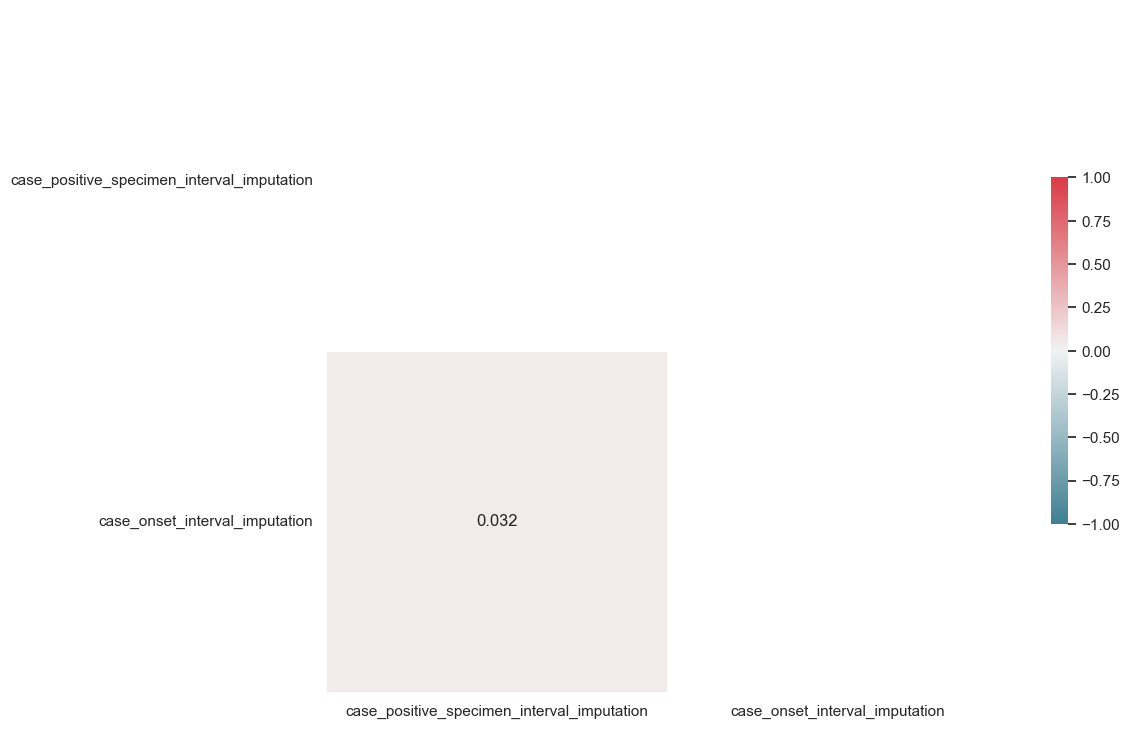

In [64]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")
continuous_columns1 = ['case_positive_specimen_interval_imputation','case_onset_interval_imputation']
# Calculate correlation of all pairs of continuous features
corr = df_combined[continuous_columns1].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 0)

<AxesSubplot: xlabel='case_positive_specimen_interval_imputation', ylabel='case_onset_interval_imputation'>

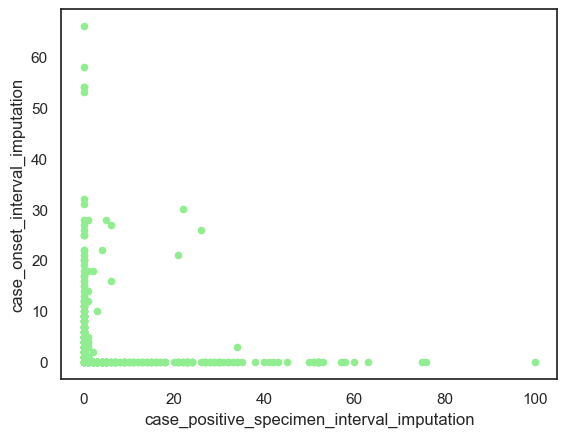

In [65]:
df_combined.plot(kind='scatter', x='case_positive_specimen_interval_imputation', y='case_onset_interval_imputation',color='lightgreen')

#### Interpretation of the results
- Strong correlations -  We can see clearly from the above heat map that there are a number of features that have string correlations
    
- Weak correlations - We can see a number of features with no apparent correlation to any other features
   
- There are simply too many correlations to interpret individually. In the coming plots will see the correlations against the target and can take further action then.


**Current status : **
- We will label these as low_information_gain features

### 1.2.2 Plot interaction between continuous features and target feature
- Here we will loop over each continuous feature and make a scatter plot against the target 'death_yn'
- We will discuss what we observe from these plots, e.g. which continuous features seem to be better at predicting the target feature
- We will choose a subset of continuous features we find promising (if any) and justify our choice.

Note: death_yn needs to be an int for these scatter plots, as we have prepared earlier

,death_yn
case_onset_interval_imputation,0.005092
case_positive_specimen_interval_imputation,0.003976


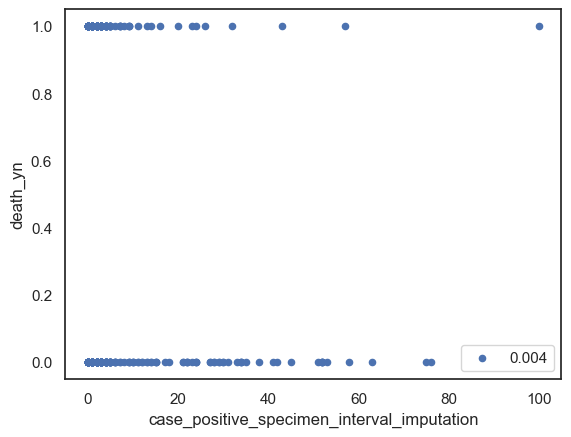

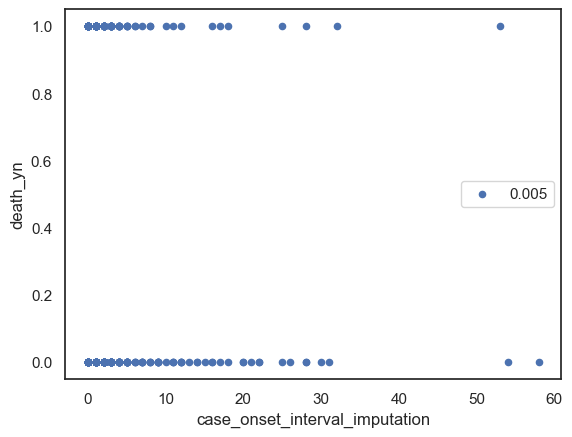

In [66]:
# dict to hold correlation values 
corr_dict = {}

# plot pairwise interaction between all continuous features and target
for column in X_train[continuous_features]:
    # create temp df to merge column and target
    df_temp = pd.concat([X_train[column], y_train], axis=1)
    # store correlation in variable
    correlation = df_temp[[column, "death_yn"]].corr().values[0,1]
    # plot the column and tartget feature
    df_temp.plot(kind='scatter', x=column, y="death_yn", label="%.3f" % correlation)
    # add correlation to dict
    corr_dict[column] = correlation

# dataframe holding sorted correlation values to aid in interpreting results
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['death_yn']).sort_values('death_yn', ascending=False)
corr_df

#### 1.2.3 Interpretation of the results
- Observing the plots, visually there are no clearly defined correlations and this is probably to be expected with a complex problem like this. There are many interactions to take into account.
- Reviewing the sorted correlation dataframe we get a better overview of all the correlations. 
- We will breakdown the correlation values into 3 bins for purposes of interpretation taking only their absolute value into account
- Note: The bounds for each bin are arbitrary and for the purpose of splitting up the features only. 


| Low correlation | Medium correlation | High correlation |
|-----------------|--------------------|------------------|
| abs(x) <= 0.15       | 0.15 <abs(x)< 0.25    | abs(x)>= 0.25        |
| 2 features     | 0  features        | 0 features       |
| 100%             | 0%                | 0%              | 

- All the continuous_features in this model are low correlations.
- I will not interpret each feature individually are there are simply too many to explore.
- No features that fall into the medium and high correlation bins. The low correlations values will likely have little effect on the outcome and make the model more complicated.
- The impact of this decision will be evaluated in part 5.

List of low correlation features

In [67]:
# generate list of features for low correlation bin
low_correlation_features = []
for key, value in corr_dict.items():
    if value < 0.15 and value > -0.15:
        low_correlation_features.append(key)
low_correlation_features

['case_positive_specimen_interval_imputation',
 'case_onset_interval_imputation']

### 1.2.3 Plot interaction between categorical features and target feature
- Here we will plot a pairwise interaction between each categorical feature against the target feature. 
- We will discuss what we observe from these plots, e.g., which categorical features seem to be better at predicting the target feature...
- We will choose a subset of categorical features we find promising (if any) and justify our choice.

Here we have 4 categorical features

- A stacked bar plot for each will be created.

##### Create stacked bar plots for all categorical features


 case_month
Index 	 Count
2020-06 	 452
2021-01 	 1799
2021-12 	 1687
2021-07 	 433
2022-01 	 3088
2020-04 	 841
2020-08 	 484
2022-05 	 728
2021-09 	 1050
2020-07 	 688
2020-11 	 1763
2020-05 	 478
2022-08 	 519
2021-04 	 576
2021-08 	 1154
2020-09 	 410
2020-12 	 2081
2021-10 	 636
2022-02 	 516
2021-03 	 683
2022-09 	 323
2020-03 	 373
2022-04 	 304
2021-05 	 277
2021-11 	 845
2022-06 	 503
2022-07 	 568
2020-10 	 771
2021-06 	 145
2021-02 	 701
2022-03 	 160
2022-10 	 246
2022-11 	 101
2020-01 	 5
2020-02 	 1

 res_state
Index 	 Count
TX 	 1356
CA 	 811
IL 	 262
NY 	 2612
MA 	 295
AZ 	 638
OH 	 1452
FL 	 1947
PA 	 526
AL 	 150
MN 	 1214
NC 	 2265
KY 	 895
VA 	 547
NH 	 90
PR 	 75
MI 	 698
SC 	 466
AR 	 210
WI 	 399
ID 	 247
OR 	 319
ME 	 241
KS 	 723
UT 	 295
NJ 	 2356
IN 	 1394
MD 	 805
CO 	 192
OK 	 318
VT 	 26
MO 	 106
NV 	 385
RI 	 145
IA 	 81
TN 	 319
MS 	 29
GA 	 17
LA 	 44
CT 	 71
DC 	 72
NM 	 49
WY 	 31
MT 	 128
WA 	 70
ND 	 12
VI 	 2
GU 	 1
AK 	 3

 county_fips_code
Index

42097.0 	 2
35031.0 	 5
17197.0 	 12
34033.0 	 8
51155.0 	 2
39109.0 	 13
50025.0 	 2
25013.0 	 16
4005.0 	 12
47187.0 	 13
51800.0 	 9
40019.0 	 7
39039.0 	 8
51197.0 	 2
33005.0 	 4
39119.0 	 9
39025.0 	 22
39063.0 	 5
26157.0 	 4
26115.0 	 14
55019.0 	 8
21167.0 	 6
48085.0 	 12
48499.0 	 1
21071.0 	 7
19125.0 	 1
37087.0 	 8
20079.0 	 15
18105.0 	 28
48453.0 	 17
1133.0 	 1
48451.0 	 3
37141.0 	 21
26077.0 	 7
37107.0 	 6
18143.0 	 3
48329.0 	 10
51173.0 	 7
5071.0 	 2
42081.0 	 2
37017.0 	 8
37049.0 	 24
4007.0 	 7
48227.0 	 3
26057.0 	 5
48485.0 	 12
18181.0 	 9
39001.0 	 4
24017.0 	 20
1089.0 	 7
51770.0 	 6
40121.0 	 5
20045.0 	 21
48355.0 	 6
5009.0 	 2
51710.0 	 16
37013.0 	 8
41065.0 	 5
45007.0 	 21
39171.0 	 2
51015.0 	 5
42073.0 	 6
12019.0 	 15
18023.0 	 8
36107.0 	 9
42079.0 	 19
37059.0 	 15
18079.0 	 8
26015.0 	 4
12087.0 	 6
22071.0 	 6
21037.0 	 14
16083.0 	 14
42019.0 	 7
5035.0 	 2
21049.0 	 2
5103.0 	 2
36109.0 	 18
36053.0 	 18
5119.0 	 25
49049.0 	 24
36003.0 	


 age_group
Index 	 Count
65+ years 	 7767
0 - 17 years 	 3426
18 to 49 years 	 9731
50 to 64 years 	 4211
Unknown 	 254

 sex
Index 	 Count
Female 	 12723
Male 	 11958
Unknown 	 708

 race
Index 	 Count
Unknown 	 6189
White 	 15668
Black 	 2650
Asian 	 553
Multiple/Other 	 229
Native Hawaiian/Other Pacific Islander 	 5
American Indian/Alaska Native 	 95

 ethnicity
Index 	 Count
Unknown 	 8010
Non-Hispanic/Latino 	 15267
Hispanic/Latino 	 2112

 current_status
Index 	 Count
Laboratory-confirmed case 	 21395
Probable Case 	 3994

 symptom_status
Index 	 Count
Symptomatic 	 25057
Asymptomatic 	 332

 hosp_yn
Index 	 Count
No 	 12911
Unknown 	 8433
Yes 	 4045

 icu_yn
Index 	 Count
No 	 11660
Unknown 	 13130
Yes 	 599

 underlying_conditions_yn
Index 	 Count
Unknown 	 23151
Yes 	 2203
No 	 35

 case_season
Index 	 Count
Summer 	 4946
Cold Winter 	 12587
Spring 	 4420
Autumn 	 3436

 region
Index 	 Count
Northeast 	 8991
West 	 3168
Midwest 	 6341
South 	 6889

 regional_affluence
Index 	

Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]), which exceeds Locator.MAXTICKS (1000).


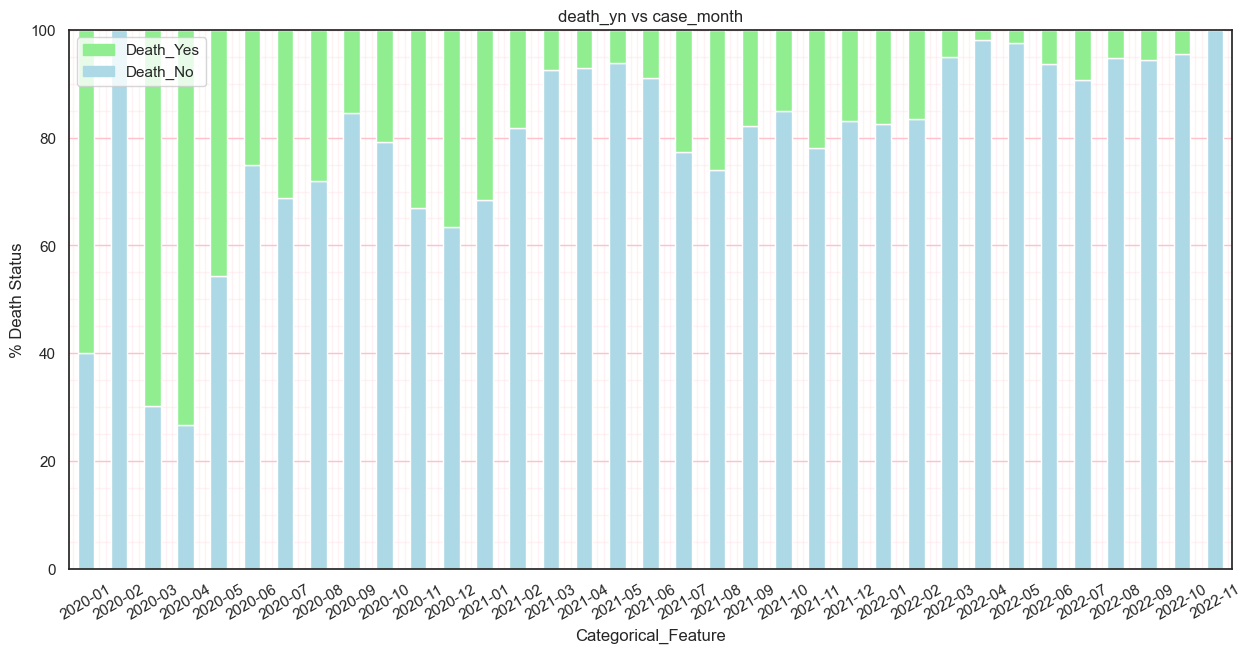

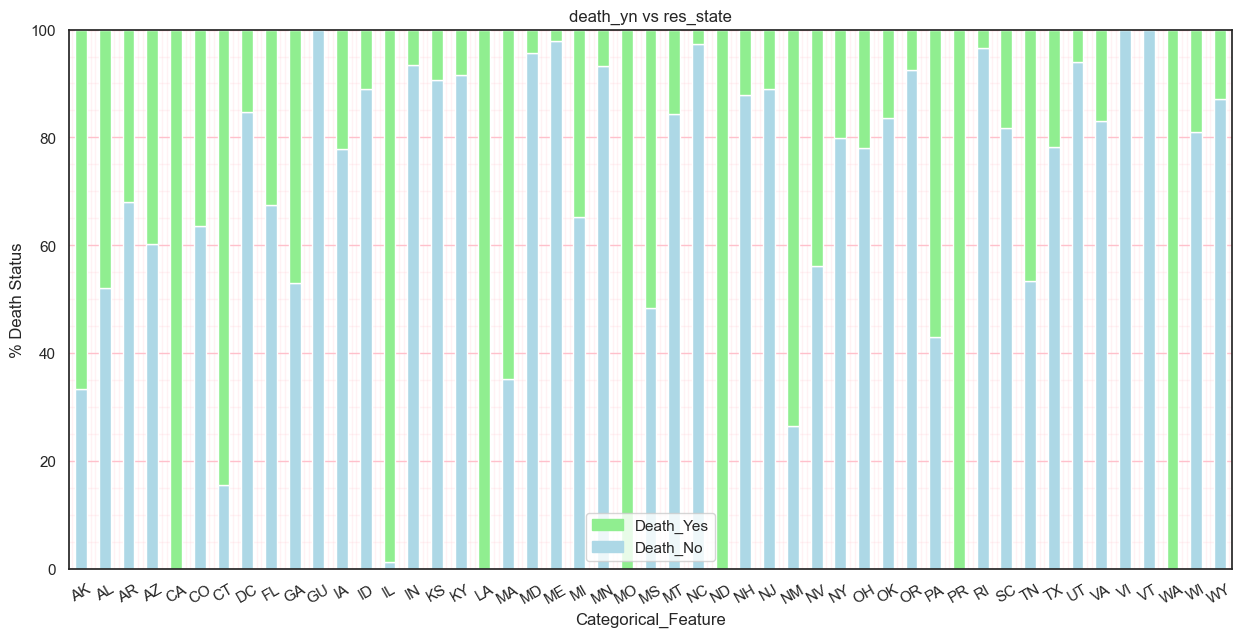

Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 6621 ticks ([-0.4, ..., 1323.6]),

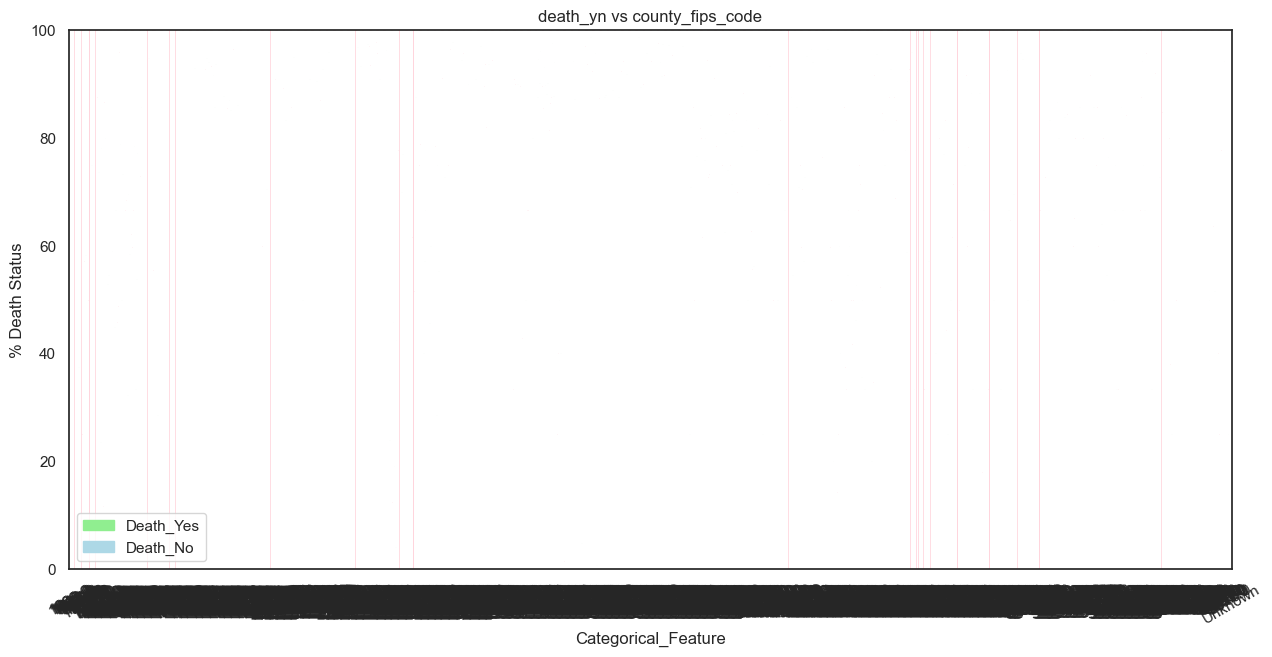

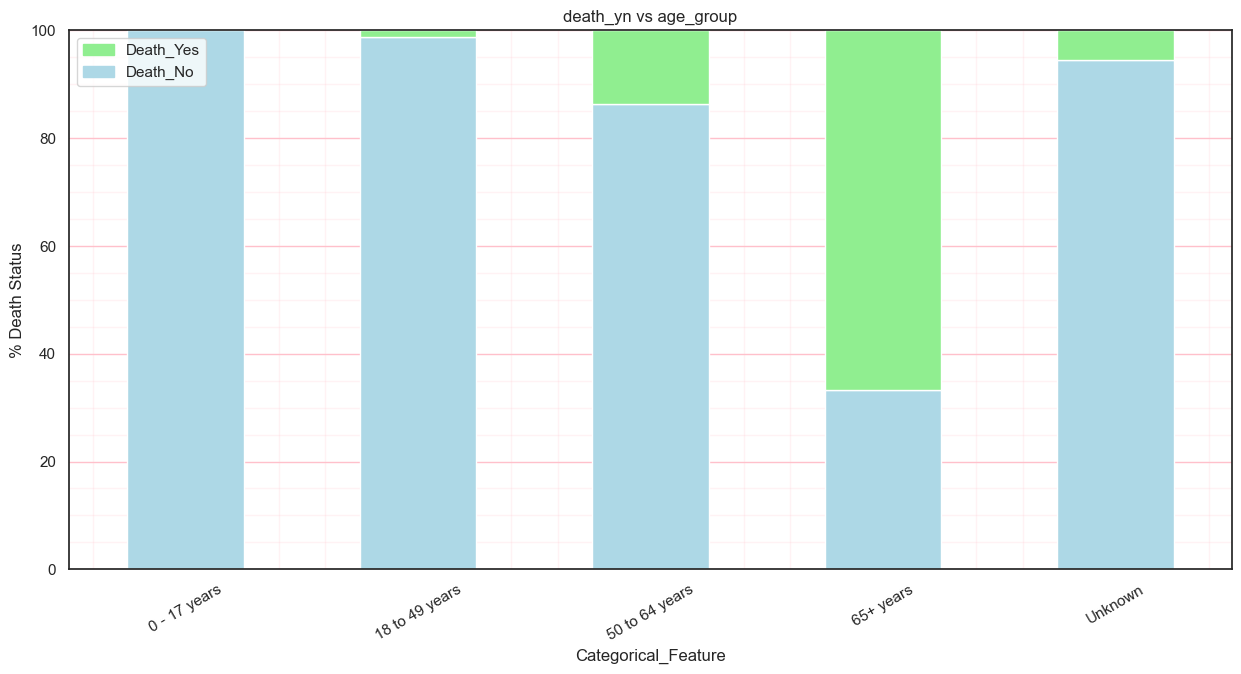

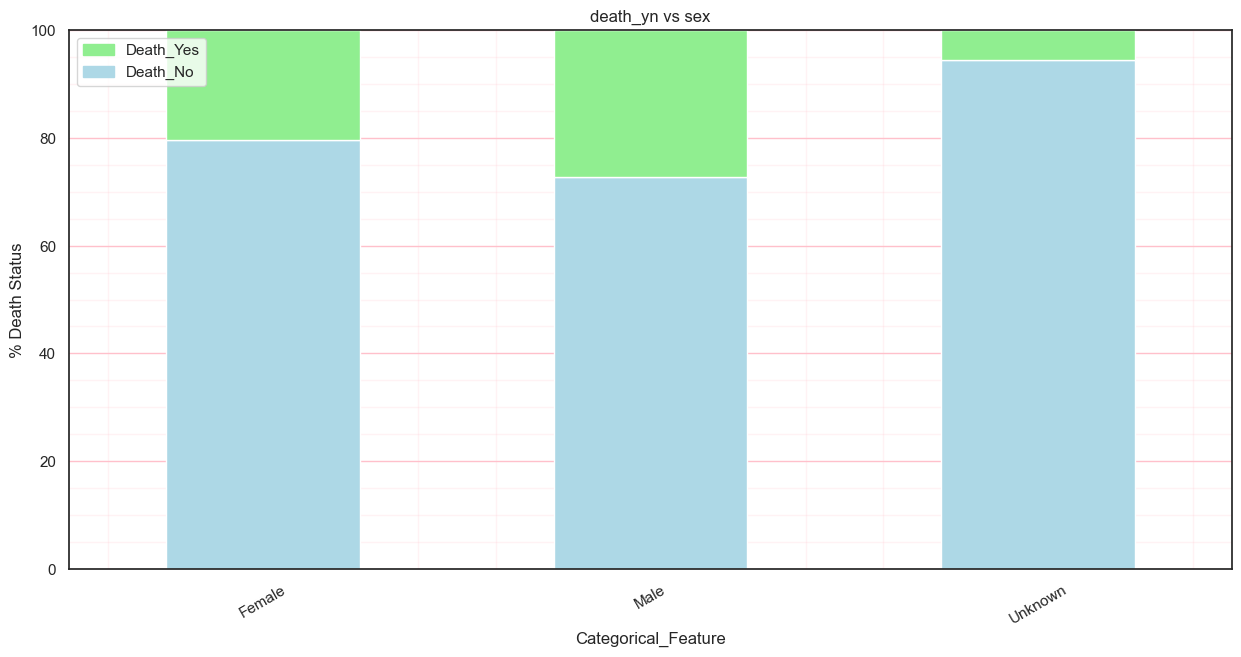

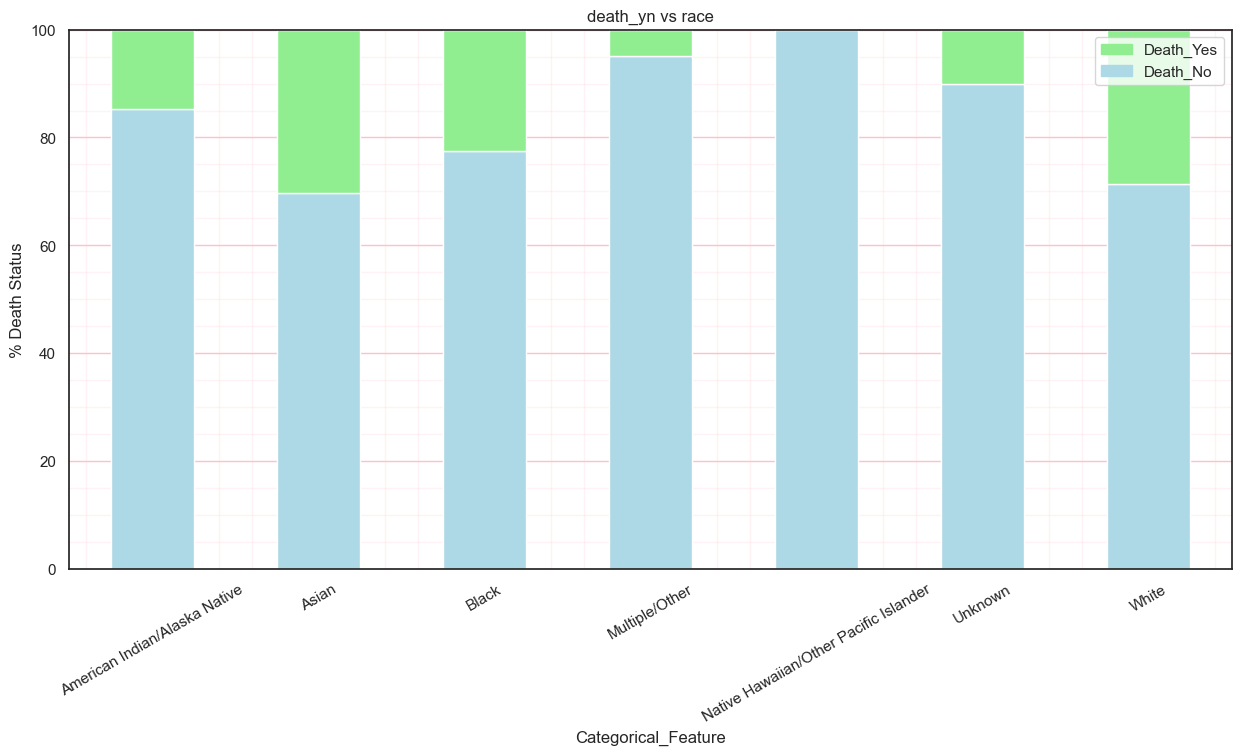

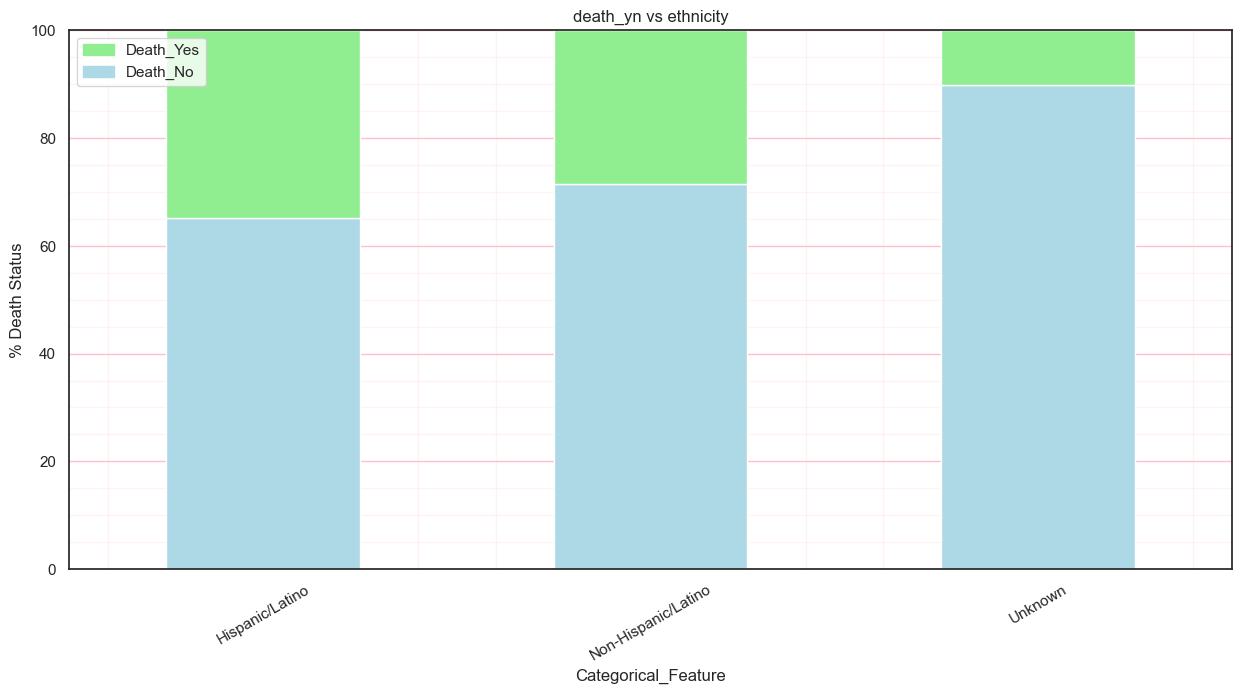

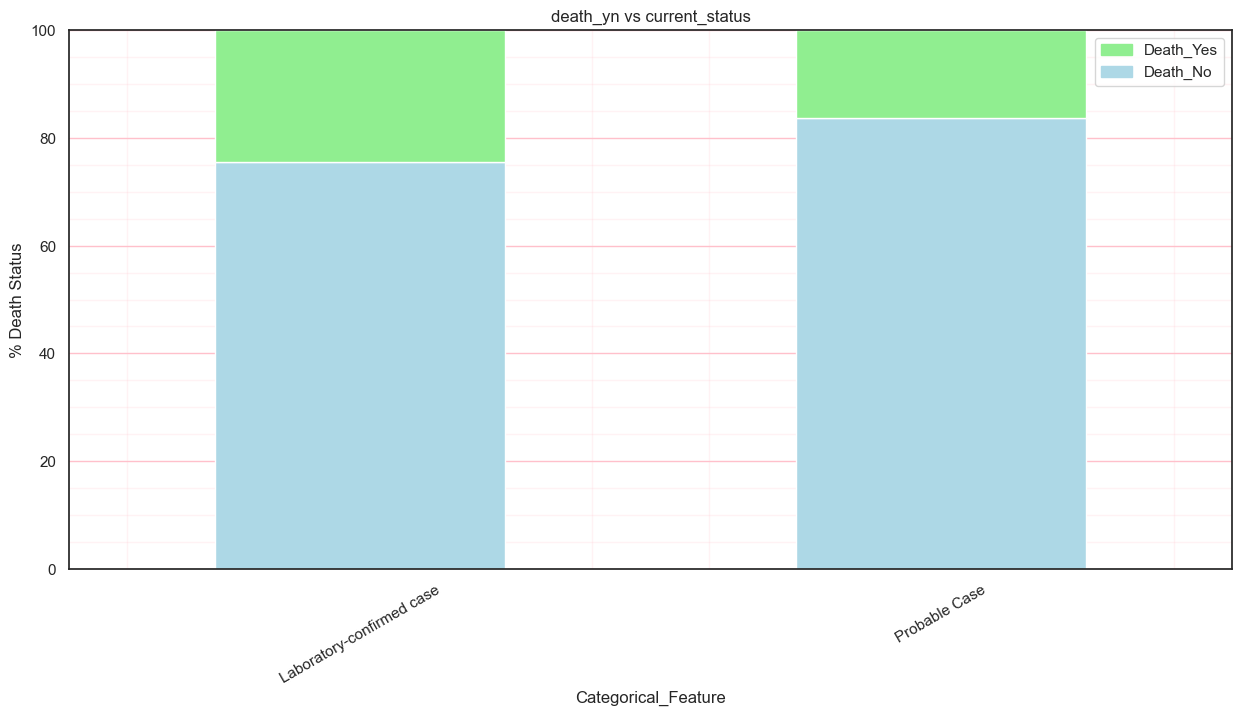

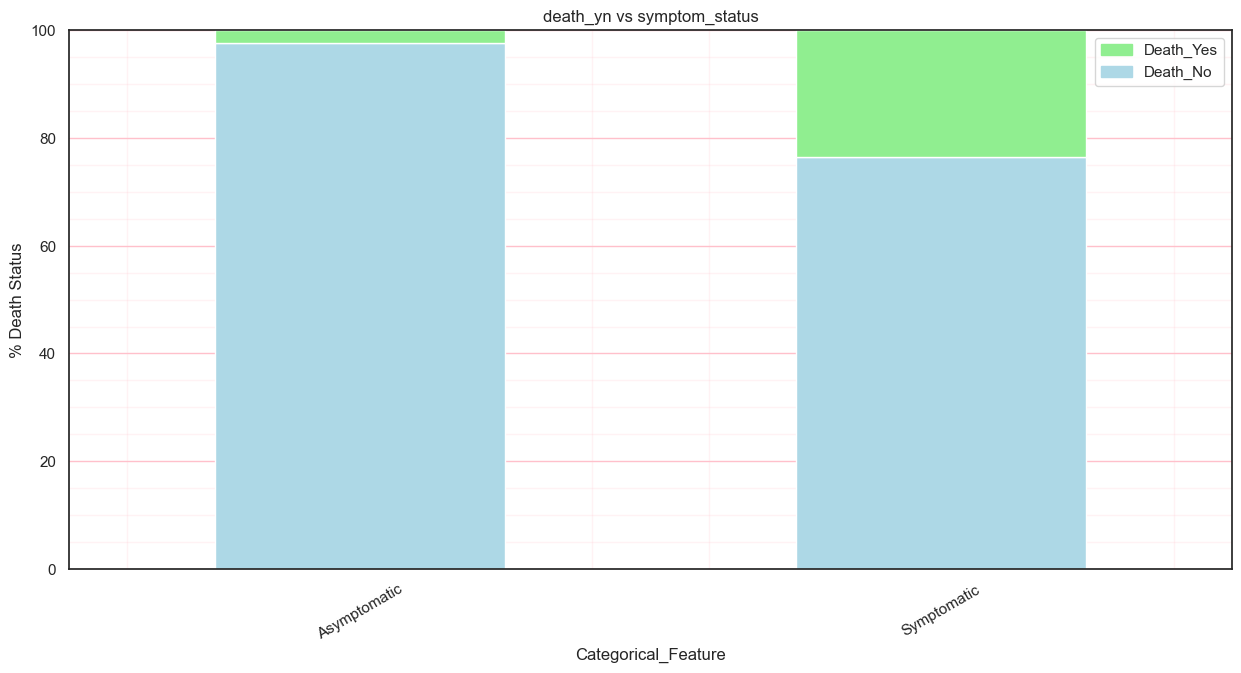

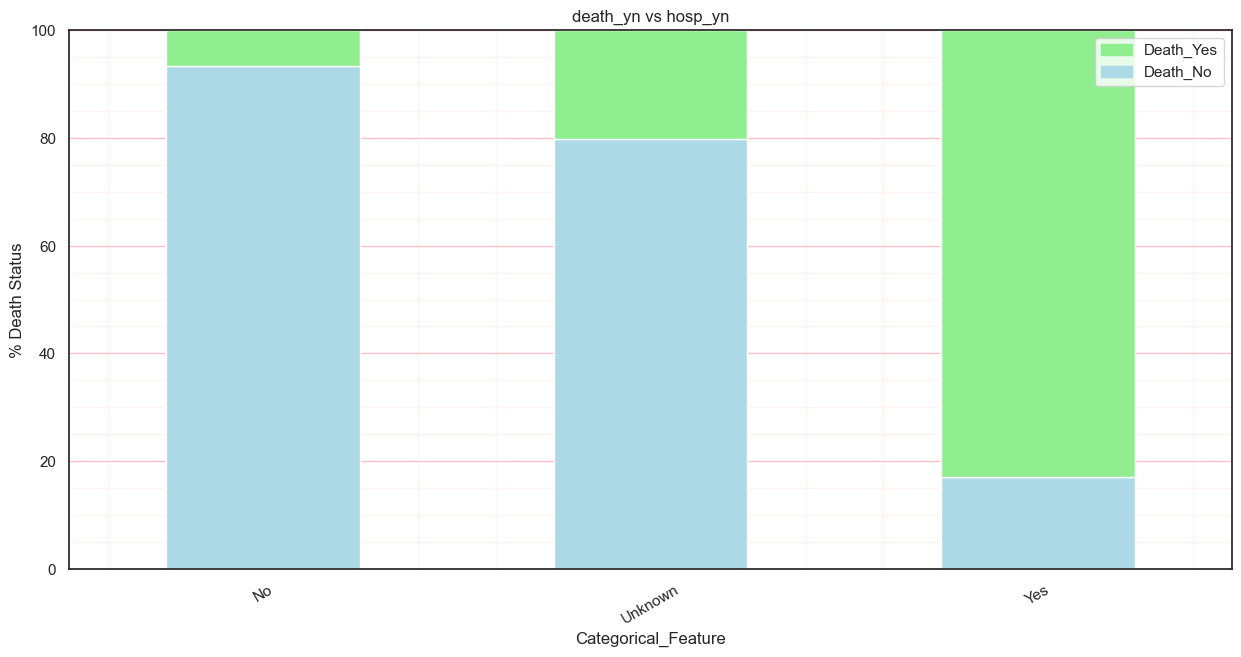

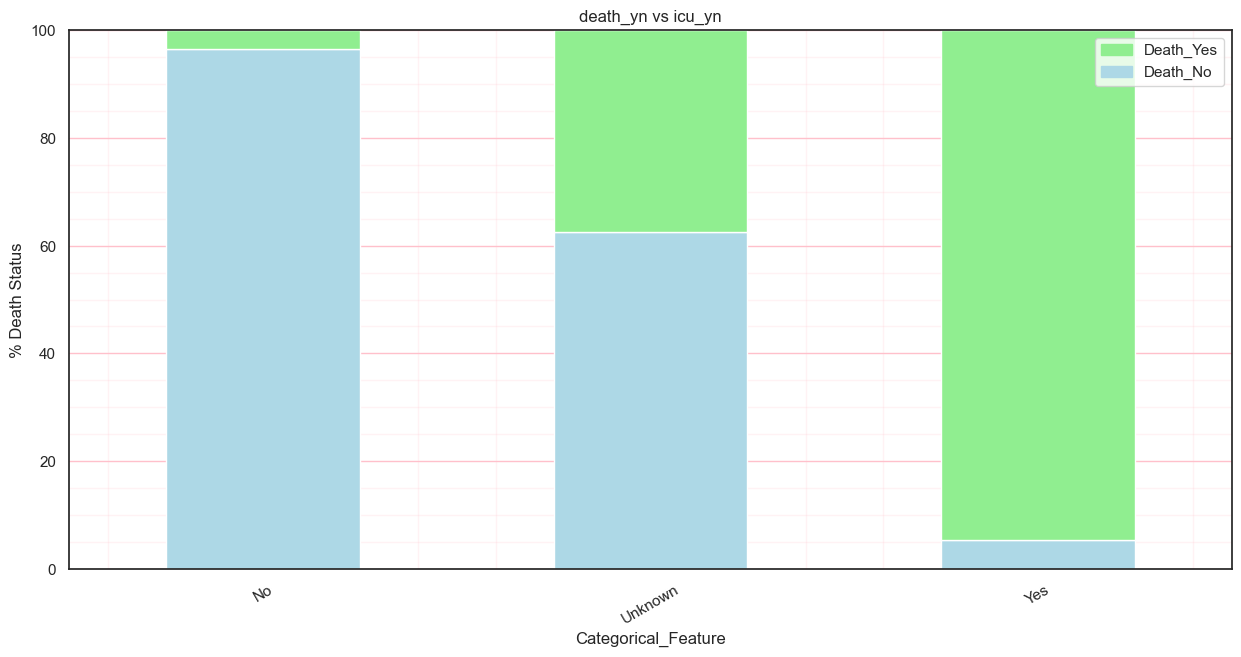

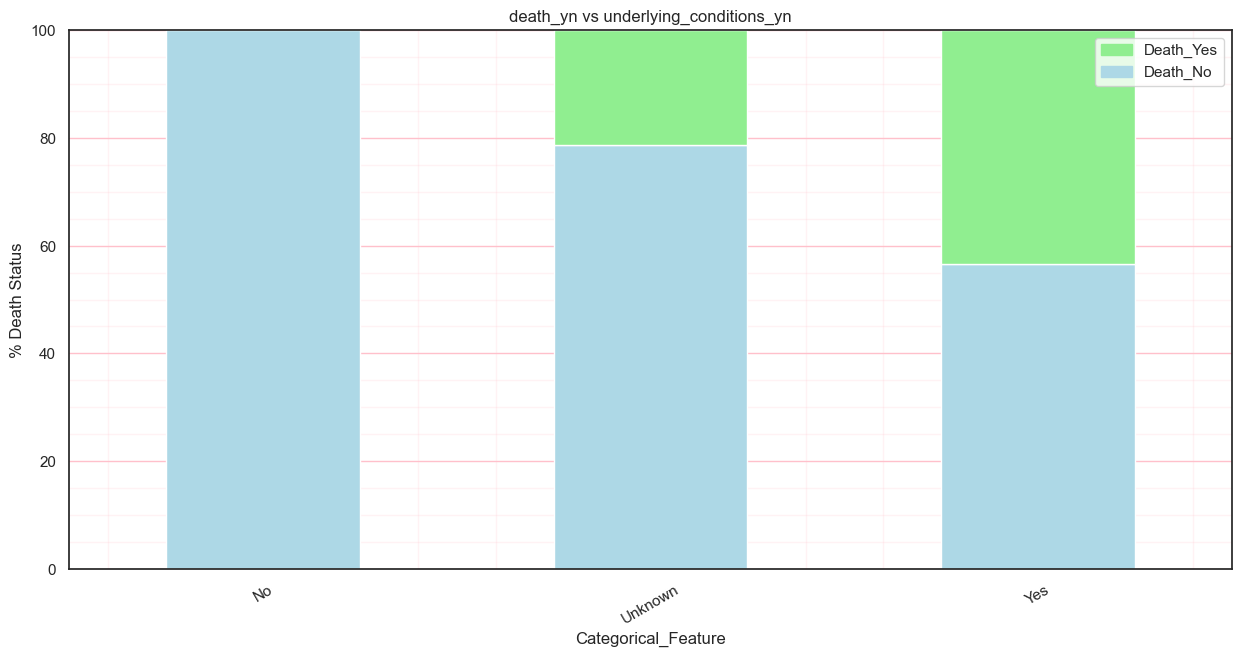

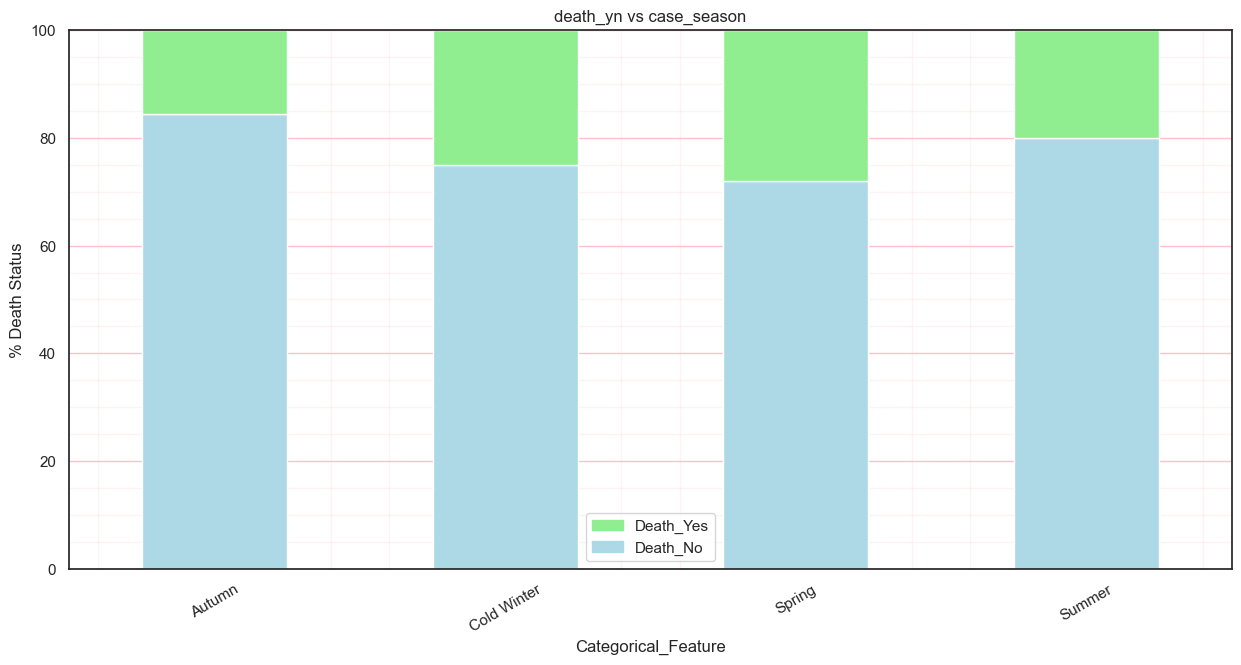

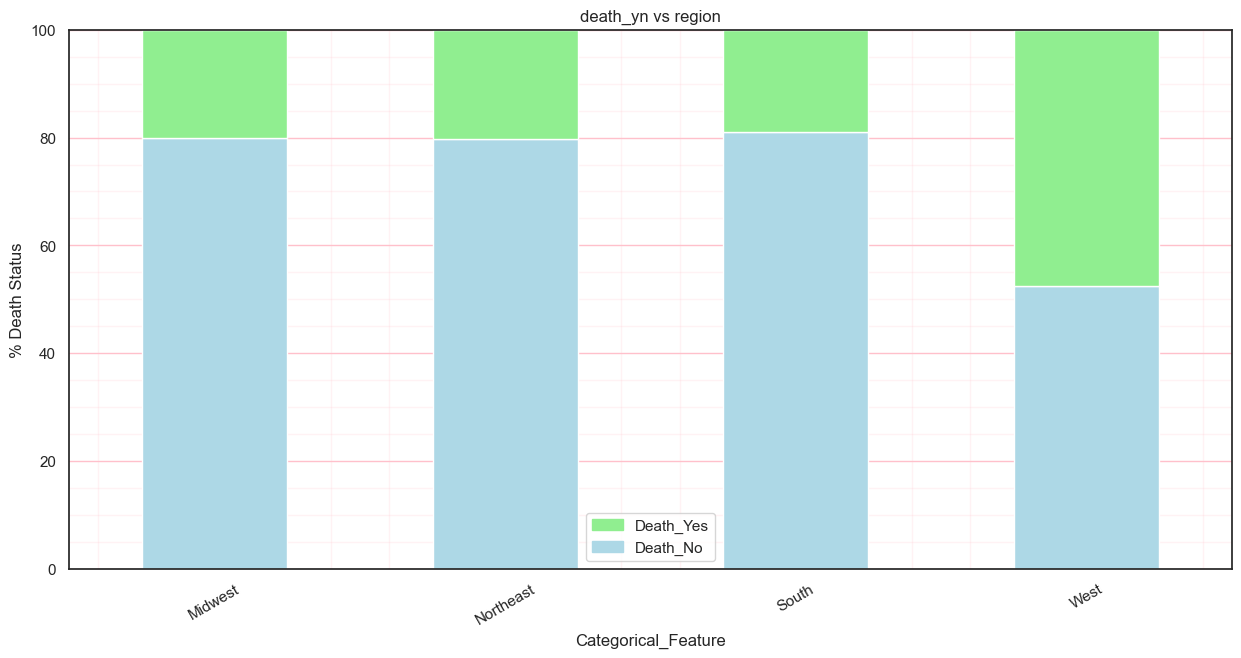

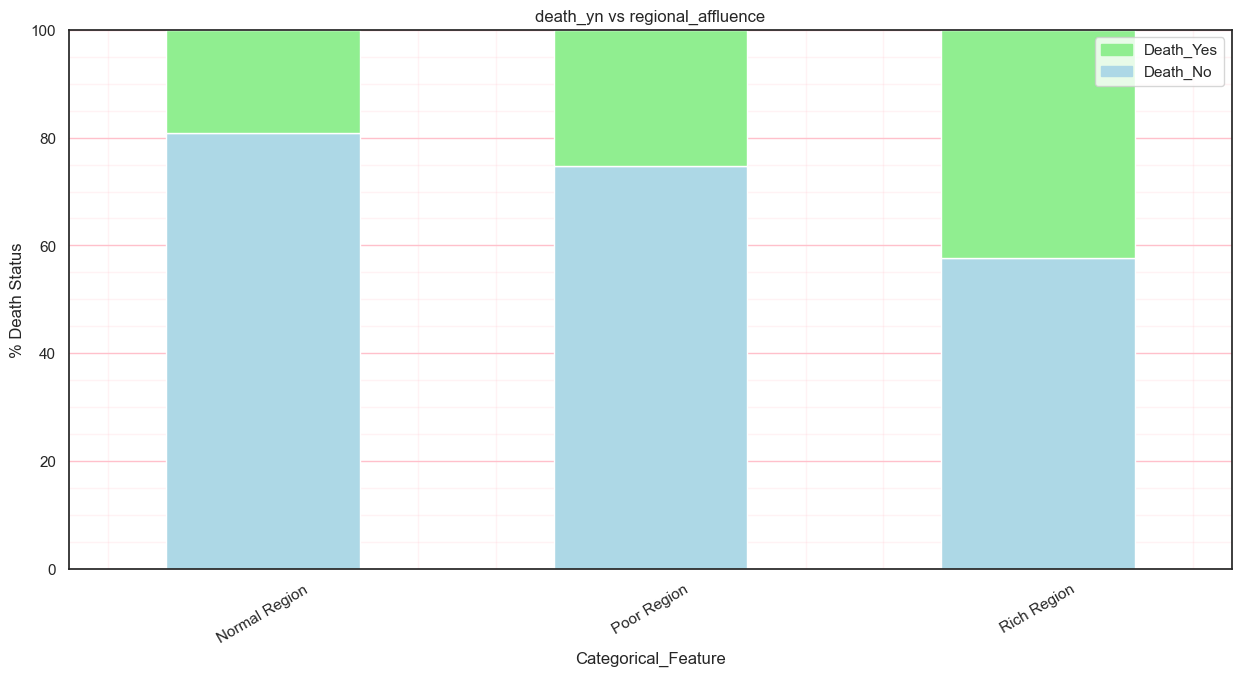

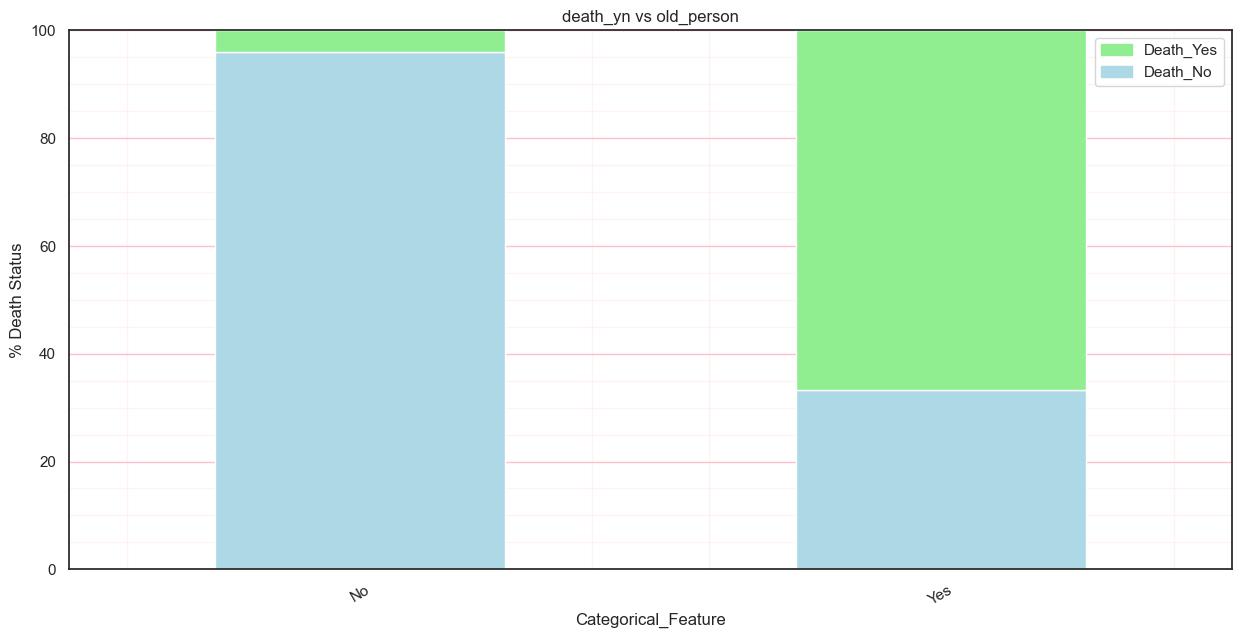

In [68]:
# for the comparison we will convert the target back to categorical
y_train = y_train.astype("category")
#X_train[categorical_columns].columns

# we will create temp dataframe for these plots, mergeing X_train and y_train
df_temp= pd.concat([X_train, y_train], axis=1)


# for each categorical feature create a stacked bar plot
for categorical_feature in categorical_columns:   
    # Using code from the module lab
    
    list_cate = pd.unique(df_temp[categorical_feature].ravel())

    # add new column and set values to zero
    df_temp['percent'] = 0

    #print header
    print("\n", categorical_feature)
    print("Index \t Count")

    # for each delinquency category
    for i in list_cate:

        count = df_temp[df_temp[categorical_feature] == i].count()['death_yn']
        count_percentage = (1 / count) * 100

        # print out index vs count
        print(i, "\t", count)

        index_list = df_temp[df_temp[categorical_feature] == i].index.tolist()
        for ind in index_list:
            df_temp.loc[ind, 'percent'] = count_percentage

    group = df_temp[['percent',categorical_feature,'death_yn']].groupby([categorical_feature,'death_yn']).sum()


    my_plot = group.unstack().plot(kind='bar', stacked=True, title=f"death_yn vs {categorical_feature}", figsize=(15,7), grid=True, color=['lightblue', 'lightgreen'])
    plt.xticks(rotation=30)
    # add legend
    red_patch = mpatches.Patch(color='lightgreen', label='Death_Yes')
    blue_patch = mpatches.Patch(color='lightblue', label='Death_No')
    my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

#     # add gridlines
    plt.grid(b=True, which='major', color='pink', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='pink', linestyle='-', alpha=0.2)

    

    # add labels
    my_plot.set_xlabel("Categorical_Feature")
    my_plot.set_ylabel("% Death Status")
    my_plot.set_ylim([0,100])
    
# drop 'percent' that was used only for stacked bar plot
df_temp = df_temp.drop("percent", 1)

In [69]:
# #### Reminder of scale meanings
# | Column Name| |       |       | ||||
# |-------------|----------|---------------------|-----|----|----|---|---|
# | sex|'Female' : 0 |'Male' : 1|'Unknown' : 2|
# |age_group|'0 - 17 years' : 0| '18 to 49 years' : 1| '50 to 64 years' : 2| '65+ years' : 3| 'Unknown' : 4|
# |race|'American Indian/Alaska Native' : 0 |'Asian' : 1| 'Black' : 2| 'Multiple/Other' : 3| 'Native Hawaiian/Other Pacific Islander' : 4| 'White' :5| 'Unknown':6|
# |ethnicity|'Hispanic/Latino' : 0| 'Non-Hispanic/Latino' : 1| 'Unknown' : 2|
# |current_status|'Laboratory-confirmed case' : 0| 'Probable Case' : 1|'Unknown' : 2|
# |symptom_status|'Symptomatic' : 0| 'Asymptomatic' : 1|'Unknown' : 2|
# |hosp_yn| 'No' : 0|'Yes' : 1|'Unknown' : 2|
# |icu_yn| 'No' : 0|'Yes' : 1|'Unknown' : 2|
# |underlying_conditions_yn| 'No' : 0|'Yes' : 1|'Unknown' : 2|
# |case_season|'Spring' : 0|'Summer' : 1|'Autumn' : 2|'Cold Winter' : 3|
# |region|'Northeast' : 0|'West' : 1|'South' : 2|'Midwest' : 3|
# |regional_affluence|'Normal Region' : 0|'Poor Region' : 1|'Rich Region' : 2|

#### Interpretation of the results
##### Bar Chart: By visualizing the difference between several categories and the goal characteristic, we may intuitively comprehend the link between each category and the mean of the target feature. The category characteristic may be more effective in predicting the target feature if there is a significant discrepancy.

##### Death Status vs Month（drop）
- It is clear that there is some correlation between the death rate and the month, albeit the sheer number of months makes it impossible to sum up. Thus, we will later categorize it according to seasons for correlation analysis.
- It is not advised to save the data because it is too muddled and confusing.

##### Death Status vs State（drop）
- It is clear that there is some correlation between the death rate and the State, albeit the sheer number of states makes it impossible to sum up. Thus, we will later categorize it according to region for correlation analysis.
- It is not advised to save the data because it is too muddled and confusing.

##### Death Status vs County_Fips_Code（drop）
- The material is overly convoluted and imprecise, and there is significant duplication of county and state data.
- It is not advised to save the data because it is too muddled，duplicated and confusing.

##### Death Status vs Sex	
- We can see that male patients have a greater mortality rate, indicating that there is some connection between the two.

##### Death Status vs Age_Group
- It appears to be related to mortality rate because patients over the age of 65 have a greater mortality rate(nearly 66%), while patients under the age of 17 have the lowest mortality rate(close to 0).

##### Death Status vs Race
- We can see that the mortality rates of patients of different races vary, with whites and Asians having the highest rates. As a result, there may be some correlation between racial differences and mortality rates.

##### Death Status vs Ethnicity
- We can observe that patients with different enthicities have varying mortality rates, and that this still has some bearing on the overall mortality rate.

##### Death Status vs Current_Status
- Although it is not immediately apparent, we can see that the mortality rate of patients with various current_statuses varies slightly. This may be due to some correlations.

##### Death Status vs Symptom_Status	
- We can see that the mortality rate for patients who are symptomatic is substantially higher—it is about 25%—compared to the mortality rate for patients who are asymptomatic, which is less than 3%.

##### Death Status vs Hosp_yn
- We can observe that hospitalization status and death rate are substantially correlated, with the hospitalization status having a much higher mortality rate for patients.

##### Death Status vs Icu_yn
- Patients receiving ICU care have a much higher death rate (up to 95%), and there is a significant correlation between hospitalization status and mortality.

##### Death Status vs Underlying_Conditions_yn
- Patients with underlying or pre-existing medical conditions have a significantly higher mortality rate.

##### Death Status vs Case_Season
- We combined the new functionality of seasons with months. It is clear that there is a connection between the patient fatality rate and the discovered season, with the mortality rate being greater in spring and winter.

##### Death Status vs Region
- By merging states, a new feature called region is produced. It is clear that there is a connection between geography and patient death, with western states having a higher mortality rate.

##### Death Status vs Regional_Affluence
- A new component we included from the state data is the wealth of the area. There is a relationship between an area's wealth and its mortality rate, and richer places will often have higher death rates.

##### Death Status vs old_person
- A new component we included from the Age_Group data is the wealth of the old_person. Patients over 65 years of age have a significantly higher mortality rate

**About 13 categorical features will be kept for now(sex, age_group, race, ethnicity, current_status, symptom_status, hosp_yn, icu_yn, underlying_conditions_yn, case_season, region, regional_affluence,old_person)**


### Choose a subset of categorical features you find promising (if any).

Although they are categorical characteristics, the characteristics "age_group", "race", "ethnicity", "symptom_status", "hosp_yn", "icu_yn", "underlying_condition_yn", "region", "regional affluence" and "old person" show a significant association with mortality rate. Some options of them can make the mortality rate vary significantly and exceed 15%, as shown in the graph above. So I make a list for them called "high_correlation_features_categorical."


In [70]:
redundant_categorical_features=['case_month','res_state','county_fips_code']
high_correlation_features_categorical=['age_group','race','ethnicity','symptom_status','hosp_yn','icu_yn','underlying_conditions_yn','region','regional_affluence','old_person','death_yn']

### 1.2.4 Summary & Drop Features

1. From Continuous vs Continuous plots (1.2.1) Nothing to be dropped.

2. From Continuous vs Target plots (1.2.2) we identified the following to be dropped

In [71]:
low_correlation_features

['case_positive_specimen_interval_imputation',
 'case_onset_interval_imputation']

3. From Categorical vs Target (1.2.3) we identified the following to be dropped

In [72]:
redundant_categorical_features

['case_month', 'res_state', 'county_fips_code']

We will now drop these features
- Before dropping we will duplicate the original dataframe, df, and label it df_cleaned
- We will drop features from this copy only (df_cleaned)
- This will allow us to revert to the original dataset later if we decide to compare the performance of the reduced dataset (df_rev1) with the original dataset (df_combined)

In [73]:
# drop all low correlation features
low_value_features = list(set(redundant_categorical_features + low_correlation_features))
# before dropping make copy of original
df_cleaned = df_combined.copy()
# drop low value features
df_cleaned.drop(low_value_features, 1, inplace=True)
print('\nRemaining columns:', df_cleaned.columns)
print('\nNew shape:', df_cleaned.shape)


Remaining columns: Index(['age_group', 'sex', 'race', 'ethnicity', 'current_status',
       'symptom_status', 'hosp_yn', 'icu_yn', 'death_yn',
       'underlying_conditions_yn', 'case_season', 'region',
       'regional_affluence', 'old_person'],
      dtype='object')

New shape: (36270, 14)


## Prepare dataset for modeling （Optimized）
Now we have picked our descriptive features for the whole dataset, a number of additional steps will need to be taken to prepare the dataset for modeling 
- We will now convert the categorical variables into dummies variable to allow modeling
- We will then remove the redundant dummies which contain no additional information
- We will then set up the train test split again based on the dataset with the dummies included

#### Set up dummy features. 
This will split up each categorical feature into a number of dummy features. The data type changes to "uint8"

In [74]:
# set up dummies features
df_cleaned = pd.get_dummies(df_cleaned)
df_cleaned.dtypes

death_yn                                       int64
age_group_0 - 17 years                         uint8
age_group_18 to 49 years                       uint8
age_group_50 to 64 years                       uint8
age_group_65+ years                            uint8
age_group_Unknown                              uint8
sex_Female                                     uint8
sex_Male                                       uint8
sex_Unknown                                    uint8
race_American Indian/Alaska Native             uint8
race_Asian                                     uint8
race_Black                                     uint8
race_Multiple/Other                            uint8
race_Native Hawaiian/Other Pacific Islander    uint8
race_Unknown                                   uint8
race_White                                     uint8
ethnicity_Hispanic/Latino                      uint8
ethnicity_Non-Hispanic/Latino                  uint8
ethnicity_Unknown                             

#### Remove redundant features
- None

#### Continuous columns are:
- None

In [75]:
continuous_columns = df_cleaned.select_dtypes(include=['int64']).columns.tolist()
# remove the target "death_yn"
continuous_columns.pop(0)
continuous_columns

[]

#### Categorical columns are:

In [76]:
categorical_columns =df_cleaned.select_dtypes(include=['uint8']).columns.tolist()
categorical_columns

['age_group_0 - 17 years',
 'age_group_18 to 49 years',
 'age_group_50 to 64 years',
 'age_group_65+ years',
 'age_group_Unknown',
 'sex_Female',
 'sex_Male',
 'sex_Unknown',
 'race_American Indian/Alaska Native',
 'race_Asian',
 'race_Black',
 'race_Multiple/Other',
 'race_Native Hawaiian/Other Pacific Islander',
 'race_Unknown',
 'race_White',
 'ethnicity_Hispanic/Latino',
 'ethnicity_Non-Hispanic/Latino',
 'ethnicity_Unknown',
 'current_status_Laboratory-confirmed case',
 'current_status_Probable Case',
 'symptom_status_Asymptomatic',
 'symptom_status_Symptomatic',
 'hosp_yn_No',
 'hosp_yn_Unknown',
 'hosp_yn_Yes',
 'icu_yn_No',
 'icu_yn_Unknown',
 'icu_yn_Yes',
 'underlying_conditions_yn_No',
 'underlying_conditions_yn_Unknown',
 'underlying_conditions_yn_Yes',
 'case_season_Autumn',
 'case_season_Cold Winter',
 'case_season_Spring',
 'case_season_Summer',
 'region_Midwest',
 'region_Northeast',
 'region_South',
 'region_West',
 'regional_affluence_Normal Region',
 'regional_afflue

#### Total features are:

In [77]:
features = continuous_columns + categorical_columns
features

['age_group_0 - 17 years',
 'age_group_18 to 49 years',
 'age_group_50 to 64 years',
 'age_group_65+ years',
 'age_group_Unknown',
 'sex_Female',
 'sex_Male',
 'sex_Unknown',
 'race_American Indian/Alaska Native',
 'race_Asian',
 'race_Black',
 'race_Multiple/Other',
 'race_Native Hawaiian/Other Pacific Islander',
 'race_Unknown',
 'race_White',
 'ethnicity_Hispanic/Latino',
 'ethnicity_Non-Hispanic/Latino',
 'ethnicity_Unknown',
 'current_status_Laboratory-confirmed case',
 'current_status_Probable Case',
 'symptom_status_Asymptomatic',
 'symptom_status_Symptomatic',
 'hosp_yn_No',
 'hosp_yn_Unknown',
 'hosp_yn_Yes',
 'icu_yn_No',
 'icu_yn_Unknown',
 'icu_yn_Yes',
 'underlying_conditions_yn_No',
 'underlying_conditions_yn_Unknown',
 'underlying_conditions_yn_Yes',
 'case_season_Autumn',
 'case_season_Cold Winter',
 'case_season_Spring',
 'case_season_Summer',
 'region_Midwest',
 'region_Northeast',
 'region_South',
 'region_West',
 'regional_affluence_Normal Region',
 'regional_afflue

### Setting up the train/test split
- This is based on the dataset with dummy values
- The Target is stored in dataframe "y"
- The remaining features are stored in dataframe "X"
- Both are split into training and test subsets

In [78]:
# y is the target
y = df_cleaned["death_yn"]
# X is everything else
X = df_cleaned.drop(["death_yn"],1)
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  test_size=0.3)

print("original range is: ",df_cleaned.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  36270
training range (70%):	 rows 0 to 25389
test range (30%): 	 rows 25389 to 36270


In [79]:
print("\nDescriptive features in X:\n", X_train.head(5))
print("\nTarget feature in y:\n", y_train.head(5))


Descriptive features in X:
        age_group_0 - 17 years  age_group_18 to 49 years  \
14917                       0                         0   
21693                       0                         0   
22758                       0                         0   
5670                        0                         0   
28613                       1                         0   

       age_group_50 to 64 years  age_group_65+ years  age_group_Unknown  \
14917                         0                    1                  0   
21693                         0                    1                  0   
22758                         0                    1                  0   
5670                          0                    1                  0   
28613                         0                    0                  0   

       sex_Female  sex_Male  sex_Unknown  race_American Indian/Alaska Native  \
14917           1         0            0                                   0   
21693

#### Reset the indexes of the training and test splits
- We can see from the X_train printout below that the indexes are no longer consecutive
- This is the same for y_train, X_test, y_test
- This will need to be dealt with next as it will effect merging of dataframes in the coming sections

In [80]:
X_train.head(5)

,age_group_0 - 17 years,age_group_18 to 49 years,age_group_50 to 64 years,age_group_65+ years,age_group_Unknown,sex_Female,sex_Male,sex_Unknown,race_American Indian/Alaska Native,race_Asian,...,case_season_Summer,region_Midwest,region_Northeast,region_South,region_West,regional_affluence_Normal Region,regional_affluence_Poor Region,regional_affluence_Rich Region,old_person_No,old_person_Yes
14917,0,0,0,1,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
21693,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
22758,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
5670,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,1
28613,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0


We will now reset the index of all training and test dataframes

In [81]:
# need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.head(5)

,age_group_0 - 17 years,age_group_18 to 49 years,age_group_50 to 64 years,age_group_65+ years,age_group_Unknown,sex_Female,sex_Male,sex_Unknown,race_American Indian/Alaska Native,race_Asian,...,case_season_Summer,region_Midwest,region_Northeast,region_South,region_West,regional_affluence_Normal Region,regional_affluence_Poor Region,regional_affluence_Rich Region,old_person_No,old_person_Yes
0,0,0,0,1,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0


The datasets are now ready for modeling

## (2) Linear Regression Model
#### 2.1 Train a linear regression model using only the descriptive features selected from part 1 above

- Linear Regression: Linear regression tries to find a linear equation that best describes the relationship between input features and continuous output. Linear regression is often used for regression tasks, i.e. predicting a continuous value.

#### Notice:
- The output of a linear regression model is typically used to predict continuous variables, not classification problems. In classification problems, we are trying to predict discrete class labels, whereas the output of a linear regression model is a continuous value, which means it cannot be used directly for classification.
- For classification problems, a more suitable model is logistic regression (Logistic Regression). Logistic regression models output probabilistic values, which can be applied naturally to classification problems. In addition, the logistic regression model optimizes the loss function during training to make it more suitable for classification tasks. Therefore, for classification problems, logistic regression is generally recommended over linear regression.
- Further step, for this kind of dataset that mainly consists of categorical features, other types of models such as decision trees, random forests, or gradient boosting machines are more suitable. These models are more robust to outliers and non-linear relationships between features and may perform better in such cases.

In [82]:
# Train aka fit, a model using all continuous and categorical features.
multiple_linreg = LinearRegression().fit(X_train, y_train)

#### 2.2.1 Print the coefficients learned by the model and discuss their role in the model

In [83]:
# Print the weights learned for each feature.
print("\nFeatures are: \n", X_train.columns)
print("\nCoeficients are: \n", multiple_linreg.coef_)
print("\nIntercept is: \n", multiple_linreg.intercept_)
print("\nFeatures and coeficients: \n", list(zip(X_train.columns, multiple_linreg.coef_)))


Features are: 
 Index(['age_group_0 - 17 years', 'age_group_18 to 49 years',
       'age_group_50 to 64 years', 'age_group_65+ years', 'age_group_Unknown',
       'sex_Female', 'sex_Male', 'sex_Unknown',
       'race_American Indian/Alaska Native', 'race_Asian', 'race_Black',
       'race_Multiple/Other', 'race_Native Hawaiian/Other Pacific Islander',
       'race_Unknown', 'race_White', 'ethnicity_Hispanic/Latino',
       'ethnicity_Non-Hispanic/Latino', 'ethnicity_Unknown',
       'current_status_Laboratory-confirmed case',
       'current_status_Probable Case', 'symptom_status_Asymptomatic',
       'symptom_status_Symptomatic', 'hosp_yn_No', 'hosp_yn_Unknown',
       'hosp_yn_Yes', 'icu_yn_No', 'icu_yn_Unknown', 'icu_yn_Yes',
       'underlying_conditions_yn_No', 'underlying_conditions_yn_Unknown',
       'underlying_conditions_yn_Yes', 'case_season_Autumn',
       'case_season_Cold Winter', 'case_season_Spring', 'case_season_Summer',
       'region_Midwest', 'region_Northeast', 'r

#### 2.2.2 Interpreting the linear regression model

- Linear regression is a modeling tool that is used to make predictions based on linear relationship between the target (dependent variable) and any number of predictors (independent variables)
    - It finds the line of best fit the describes the relationship between the target and predictors 
    - This line is calculated by minimising the overall error
- The linear regression formula takes the following form:
    - $target\_feature = w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n $
    - The output of this formula will be a continuous value that can be less than 0 and higher than 1
- We can see the calculated intercept is 1399996118184.8416 (w_0)
    - This is the starting point. i.e. if all other coefficients are zero then the model result will be 1399996118184.8416
    - Can be thought of as where the model line intercepts the y axis
- We can see all the coefficients for each feature
    - These are zipped together in a single list for ease of inspection.
    - The sum of all the feature*coefficients + intercept will result in the model prediction  
- We cannot make a thoroughly direct comparison based on the value of the coefficients.
    - There are no numerical/continuous features in my dataset, only categorical features. In this case, you can train the model directly with categorical features. If you are comparing the importance between features, you can consider using feature selection techniques (such as recursive feature elimination, tree-based feature selection, etc.) or obtain feature importance through the model itself (such as random forest or gradient boosting trees, etc.).
    
*It is important to note that the output from a linear regression model is not suited to the classification problem that we are trying to solve.*
- The output of a linear regression model is typically used to predict continuous variables, not classification problems. In classification problems, we are trying to predict discrete class labels, whereas the output of a linear regression model is a continuous value, which means it cannot be used directly for classification.
- We will threshold the output so that any values >=0.5 will be cast to 1, any values <0.5 will be cast to 0
- By setting a threshold, the output of a linear regression model can be converted into a classification prediction. For example, in a binary classification problem, you can predict class 1 for output values greater than or equal to 0.5 and class 0 for output values less than 0.5. This approach, while capable of class predictions, may not be optimal because linear regression models are not optimized for classification problems.
- For classification problems, a more suitable model is logistic regression (Logistic Regression). Logistic regression models output probabilistic values, which can be applied naturally to classification problems. In addition, the logistic regression model optimizes the loss function during training to make it more suitable for classification tasks. Therefore, for classification problems, logistic regression is generally recommended over linear regression.

Finally it is worth mentioning the effect outliers can have on linear regression output. 
- Consider the effect of the outlier in the graph below on the regression line and what values fall into each threshold category. 
- Outliers do have a big impact on the output of a linear regression model. Linear regression tries to find a line of best fit that minimizes the squared error between predicted and actual values. Outliers are data points that are so far away from other data points that they can cause significant changes to the fitted line, affecting the predictive ability of the model.
- Most of the features are categorical features that have been encoded as binary indicator variables. In this case, outliers are less likely to occur. However, it is also possible that there are unusual combinations among certain features, which may lead to a decrease in the performance of the model.
- For this kind of dataset that mainly consists of categorical features, other types of models such as decision trees, random forests, or gradient boosting machines are more suitable. These models are more robust to outliers and non-linear relationships between features and may perform better in such cases.
- In conclusion, in this particular dataset, while outliers may not be a major concern, linear regression may not be the most appropriate model. Trying other types of models may lead to better predictive performance.

### References recommended by professor:

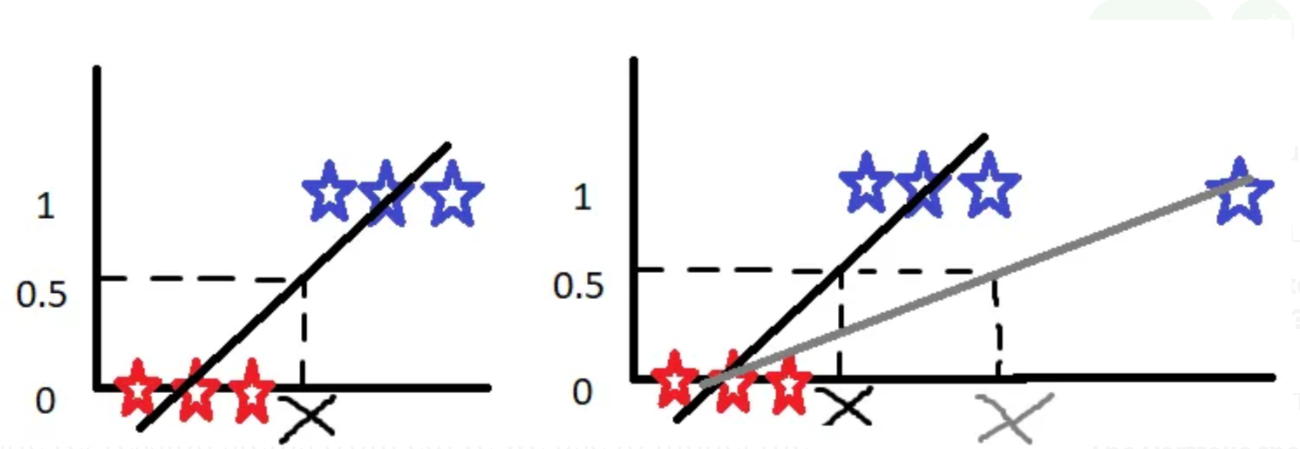

source: https://medium.com/@rgotesman1/learning-machine-learning-part-3-logistic-regression-94db47a94ea3

#### 2.3.1 Printing 10 predicted target features and evaluate the prediction
- Here we will print the predicted target feature value for the first 100 training examples. 
- We will threshold the predicted target feature value given by the linear regression model at 0.5, to get the predicted class for each example. 
    - If value is >= 0.5 it is cast to 1, if < 0.5 it is cast to 0

In [84]:
# calculate the prediction and threshold the value. If >= 0.5 its true
multiple_linreg_predictions_train = (multiple_linreg.predict(X_train) >= 0.5) * 1.0

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y_train, pd.DataFrame(multiple_linreg_predictions_train, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg.head(10))


Predictions with multiple linear regression: 

   death_yn  Predicted
0         0        0.0
1         1        1.0
2         1        1.0
3         0        1.0
4         0        0.0
5         1        1.0
6         0        0.0
7         0        0.0
8         0        0.0
9         1        1.0


*The main goal of this code is to predict the training set (X_train) using the learned multiple linear regression model (multiple_linreg) and binarize the prediction results. If the projected value is higher than or equal to 0.5, it is set to 1 (True), otherwise it is set to 0 (False).*

#### 2.3.2 Evaluation metrics based on training data
- We will print the classification evaluation measures computed on the training set (e.g. Accuracy, Confusion matrix, Precision, Recall, F1)
- We will discuss findings based on these measures

In [85]:
# Some more evaluation metrics.
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_linreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_linreg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, multiple_linreg_predictions_train))
print("======================================================")

==================== Train Data =======================
Accuracy:  0.9298515104966718
Confusion matrix: 
 [[18540   946]
 [  835  5068]]
Classification report:
                precision    recall  f1-score   support

           0       0.96      0.95      0.95     19486
           1       0.84      0.86      0.85      5903

    accuracy                           0.93     25389
   macro avg       0.90      0.90      0.90     25389
weighted avg       0.93      0.93      0.93     25389



### 2.3.3 Detailed parameter explanation:

- Confusion Matrix: This is a table that describes the connection between the classification model's expected and actual outcomes. The confusion matrix in this binary classification issue contains four parts: True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN). It is useful in understanding how effectively the model classifies different classes.


- Precision: The percentage of positive cases predicted by the model (1) that are really positive. Precision = TP / (TP + FP) is the formula for calculating precision. Precision measures how well the model predicts positive examples.


- Recall (recall rate): The proportion of samples that are truly positive instances that the model predicts as positive examples. Recall = TP / (TP + FN) is the calculating formula. The recall rate demonstrates the model's ability to recognize true positive cases.


- The F1-score (F1 value) is the harmonic mean of accuracy and recall that is used to completely evaluate the model's performance. F1 = 2 * (Precision * Recall) / (Precision + Recall) is the calculating formula. When both accuracy and recall are high, so is the F1 value. It aids in striking a balance between accuracy and recall.


- The quantity of real samples in each category is referred to as support. In this example, class 0 has 19486 samples, whereas class 1 contains 5903 samples. Support assists us in comprehending the distribution of various classes in a dataset.




##### Interpretation of results
- Accuracy
    - This is simply stating how often the model is correct. We have an accuracy of 92.99%
- Confusion Matrix

     [[True Negative (TN)   False Positive (FP)]
    
     [False Negative (FN)  True Positive (TP)]]
     
    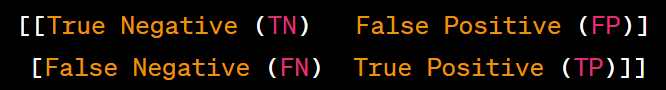
     
    - [0][0] TRUE NEGATIVE - The number that is predicted 0 that was actually 0
    - [0][1] FALSE POSITIVE - The number that is predicted 1 that is actually 0
    - [1][0] FALSE NEGATIVE - The number that is predicted 0 that is actually 1
    - [1][1] TRUE POSITIVE - The number that is predicted 1 that is actually 1
- Precision - How good the model is at predicting the positive class
    - What % of the predicted positive are actually positive
    - It is the number values correctly predicted positive over the total number of  positive values
    - Precision Positive is 0.84
    - Precision Negative is 0.96
- Recall
    - What % of the positive values did we predict
    - Is the number correctly predicted positive over the total number actual positive
    - Recall Positive is 0.86
    - Recall Negative is 0.95
- F1 Score
    - Is an a weighted average of Precision and recall
    - F1 Score Positive is 0.85
    - F1 Score Negative is 0.95

Summary
- Theses values seem reasonable. 
- The model is more better at predicting the negative class.
- This makes sense as the model has more negative data to learn from - it is the majority class. 
- False Positive (FP) is when a patient is predicted to die, but does not actually die. False Negative (FN) is when a patient is predicted not to die, but actually dies.
- The numbers of FP and FN are quite close. However, FP is slightly higher than FN, which means that the model slightly overestimates the patient's risk of death. In other words, the model predicted the patient's death a little higher than it actually did. However, the gap is not large, so we cannot say that the model significantly overestimates.
- Slight overestimates may be helpful for death prediction in some cases. In the medical field, we generally prefer to make conservative estimates of risk to patients to ensure appropriate precautions are taken. Therefore, in this case, minor overestimates may lead to more aggressive interventions to reduce the risk of patient death.
- However, excessive overestimates may also lead to unnecessary treatments or interventions, which may negatively impact patients. Therefore, these potential advantages and disadvantages need to be weighed when analyzing the prediction results of the model.
- In this example, our model only slightly overestimates, which may help ensure that patients receive adequate attention and treatment. However, in practical applications, medical professionals also need to judge the reliability and applicability of model predictions based on their professional knowledge and understanding of patient-specific conditions.

#### 2.4.1 Evaluate the model using the hold-out (30% examples) test set
- The results from the test data will be compared the results from the training data.
- In addition they will be compared to the results from a cross-validated model (i.e. a new model trained and evaluated using cross-validation on the full dataset).

Printing Actual death_yn vs predicted based on test data

In [86]:
# calculate the prediction and threshold the value. If >= 0.5 its true
multiple_linreg_predictions_test = (multiple_linreg.predict(X_test) >= 0.5) * 1.0

print("\nPredictions with multiple linear regression: \n")
actual_vs_predicted_multiplelinreg = pd.concat([y_test, pd.DataFrame(multiple_linreg_predictions_test, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelinreg.head(10))


Predictions with multiple linear regression: 

   death_yn  Predicted
0         0        0.0
1         0        0.0
2         0        0.0
3         1        0.0
4         1        1.0
5         1        1.0
6         0        0.0
7         0        0.0
8         0        0.0
9         1        1.0


##### 2.4.2 Evaluation metrics based on test data

In [87]:
# Some more evaluation metrics.
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, multiple_linreg_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, multiple_linreg_predictions_test))
print("Classification report - Test data:\n ", metrics.classification_report(y_test, multiple_linreg_predictions_test))
print("\n==================== Train Data ======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_linreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_linreg_predictions_train))
print("\nClassification report: - Training data\n ", metrics.classification_report(y_train, multiple_linreg_predictions_train))

==================== Test Data =======================
Accuracy:  0.926661152467604
Confusion matrix: 
 [[7917  427]
 [ 371 2166]]
Classification report - Test data:
                precision    recall  f1-score   support

           0       0.96      0.95      0.95      8344
           1       0.84      0.85      0.84      2537

    accuracy                           0.93     10881
   macro avg       0.90      0.90      0.90     10881
weighted avg       0.93      0.93      0.93     10881


==================== Train Data ======================
Accuracy:  0.9298515104966718
Confusion matrix: 
 [[18540   946]
 [  835  5068]]

Classification report: - Training data
                precision    recall  f1-score   support

           0       0.96      0.95      0.95     19486
           1       0.84      0.86      0.85      5903

    accuracy                           0.93     25389
   macro avg       0.90      0.90      0.90     25389
weighted avg       0.93      0.93      0.93     25389


**2.4.3Interpretation of test results and comparison with training results**
- Accuracy
    - 92.99% accuracy on training data and 92.67% accuracy on test data. 
    - These two numbers are very close, indicating that the model performs similarly on the training set and the test set, and there is no problem of overfitting or underfitting. 
- Confusion matrix:
    - It shows the relationship between the outcomes predicted by the model and the actual outcomes. The numbers on the main diagonal (True Positive and True Negative) are high in both the training and test data, indicating that the model correctly predicted most cases. 
    - At the same time, the number of False Positive and False Negative is relatively small, indicating that the misjudgment rate of the model is low.
- Precision
    - Precision refers to the ratio of the number of correctly predicted positive examples to the number of all predicted positive examples. 
    - In the test data and training data, the precision is 0.84 and 0.84 respectively, which means the model has high accuracy in predicting positive samples.
    - In the test data and training data, the precision is 0.84 and 0.84 respectively, which means the model has high accuracy in predicting positive samples.
    - The precision score for predicting the positive case has not changed, and are all 0.84.
    - The precision score for predicting the negative case has not changed, and are all 0.96.
- Recall
    - The recall score for predicting the positive case has reduced from 86% to 85%.
    - The recall score for predicting the negative case has not changed, and are all 95%.
- F1
    - The f1 score for predicting the positive case has reduced from 85% to 84%.
    - The f1 score for predicting the negative case has not changed, and are all 95%.

**Summary**
- The linear regression model performed similarly on the training and test data without significant overfitting or underfitting issues.
- At the same time, the model performed better in identifying both negative and positive samples, although it performed slightly better in identifying negative samples.
- At the same time, the model performed relatively well on metrics such as accuracy, precision, recall, and F1 score.
- More comparisons need to be made and this is where cross validation steps in.

#### 2.4.4 Cross validation
- We will now perform cross validation on the linear regression model. 
- Here we perform the same evaluation as above but multiple times
- Each time the data is shuffled so we get a slightly different view of the data for training and testing
- This works well for evaluating on a limited set of data
- We will store the results in a dictionary for later use

First we need to create a function to perform this cross validation. Sklearn does not provide one for linear regression. However it does for logistic and random forests models
- Cross validation Function can be seen below

### Research:

**Pros of Cross validation**

- More accurate performance evaluation: By dividing the data set into multiple different training and testing subsets, cross-validation can reduce the contingency caused by a single data division, thus making the model performance evaluation more accurate and stable.

- Avoid overfitting: Cross-validation helps detect if the model is overfitting. Because in each iteration, the model is trained and validated on different training subsets. If the model performs well on some subsets, but poorly on others, this could be a sign of overfitting.

- Parameter tuning: The combination of cross-validation and grid search (Grid Search) can find the optimal model parameters. This helps improve the generalization ability of the model on unseen data.

- Better feature selection: Cross-validation allows you to more accurately assess the impact of different feature combinations on model performance, allowing for better feature selection.

- Conclusion
    - It is important to note that cross-validation is computationally expensive, especially on large datasets. But overall, cross-validation is a very practical and widely used method for model evaluation and selection. For classification problems, especially when the amount of data is limited, cross-validation is a good evaluation method.
    
- **Cross-validation is still a good evaluation method in the case of all categorical features, because it can reduce the contingency caused by a single data division and make the model performance evaluation more accurate and stable. On a dataset full of categorical features, linear regression may not be the best choice, but cross-validation is still a good way to evaluate if we decide to use linear regression**

In [88]:
def cross_val_LinReg(X, y, cv=3, scoring='accuracy'):
    """Functions to carry out cross validation on the linear regression model
    Default number of validations is 3. The randon state will be updated 
    at each iteration to allow our results to be repeated"""
    
    # store results
    results = []
    # evaluate cv times and append to results
    for i in range(cv):
        # set up train test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i , test_size=0.3)
        # generate model
        multiple_linreg = LinearRegression().fit(X_train, y_train)
        # threshold
        multiple_linreg_predictions = (multiple_linreg.predict(X_test) >= 0.5) * 1.0
        # calc score
        if scoring=='accuracy':
            score = metrics.accuracy_score(y_test, multiple_linreg_predictions)
        elif scoring=='precision':
            score = metrics.precision_score(y_test, multiple_linreg_predictions)
        elif scoring=='f1':
            score = metrics.f1_score(y_test, multiple_linreg_predictions)
        elif scoring=='recall':
            score = metrics.recall_score(y_test, multiple_linreg_predictions)
        # append to results
        results.append(score)
    return results

We will now create an additional function to perform 10 fold cross validation and store results into a dataframe
- This will be used to simplify further analysis the dataset, looking at accuracy, precision, recall, f1.

In [89]:
def cross_val_LinReg_DF(X,y):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    linRegResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']
    
    for metric in test_metrics:
        # generate test results
        result = cross_val_LinReg(X, y, cv=10, scoring=metric)
        length = len(result)
        # store result in dict
        linRegResults[metric] = sum(result)/length

    # create dataframe with results
    LinRegDF = pd.DataFrame.from_dict(linRegResults, orient='index', columns=['Linear_Regression'])
    
    return LinRegDF

Preform 10 fold cross validation using cross_val_LinReg_DF function
- Results summarised below

In [90]:
linRegDF = cross_val_LinReg_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
linRegDF

Mean results from 10 fold cross validation are:


,Linear_Regression
accuracy,0.929722
precision,0.842454
recall,0.857142
f1,0.849597


These results are marginally little higher than testing results and little lower than training results but this is expected. We have taken the mean of 10 sets of results. 

## (3) Logistic Regression   

#### 3.1 Train a logistic regression model using only the descriptive features selected from part 1 above
- Logistic Regression: Logistic regression is an extension of linear regression for dealing with binary classification problems. Logistic regression uses the sigmoid function to map the output of linear regression between 0 and 1, representing the probability of belonging to a certain class. The probabilities are then converted to binary classification results by a threshold (usually 0.5).

In [91]:
# Train aka fit, a model using all continuous and categorical features.
multiple_logisticreg = LogisticRegression().fit(X_train, y_train)

#### 3.2.1 Print out the coefficients learned by the model

In [92]:
# Print the weights learned for each feature.
print("\nFeatures are: \n", X_train.columns)
print("\nCoeficients are: \n", multiple_logisticreg.coef_[0])
print("\nIntercept is: \n", multiple_logisticreg.intercept_)
print("\nFeatures and coeficients: \n", list(zip(X_train.columns, multiple_logisticreg.coef_[0])))


Features are: 
 Index(['age_group_0 - 17 years', 'age_group_18 to 49 years',
       'age_group_50 to 64 years', 'age_group_65+ years', 'age_group_Unknown',
       'sex_Female', 'sex_Male', 'sex_Unknown',
       'race_American Indian/Alaska Native', 'race_Asian', 'race_Black',
       'race_Multiple/Other', 'race_Native Hawaiian/Other Pacific Islander',
       'race_Unknown', 'race_White', 'ethnicity_Hispanic/Latino',
       'ethnicity_Non-Hispanic/Latino', 'ethnicity_Unknown',
       'current_status_Laboratory-confirmed case',
       'current_status_Probable Case', 'symptom_status_Asymptomatic',
       'symptom_status_Symptomatic', 'hosp_yn_No', 'hosp_yn_Unknown',
       'hosp_yn_Yes', 'icu_yn_No', 'icu_yn_Unknown', 'icu_yn_Yes',
       'underlying_conditions_yn_No', 'underlying_conditions_yn_Unknown',
       'underlying_conditions_yn_Yes', 'case_season_Autumn',
       'case_season_Cold Winter', 'case_season_Spring', 'case_season_Summer',
       'region_Midwest', 'region_Northeast', 'r

#### 3.2.2 Interpreting the results 

The logistic regression function is a little different than the linear regression function. 
- The output of the logistic function is a probability, a value between 0 and 1
- The output of the linear function is a continuous value that is not a probability
- Differences aside there is a direct relationship between the two
    - The first part of logistic regression function is similar to linear regression i.e. We find the line of best fit
    - We then pass this equation through what is called a sigmoid function
    - This sigmoid function will output a value bound between 0 and 1. It is a probability
    - The model then applies a threshold to this probability so that if is is >= 0.5 its cast to 1 and if it is <0.5 it is cast to 0
    - All of these steps are carried out within the logistic regression function, however the threshold value can be adjusted up or down depending on the problem you are trying to solve.
- Logistic Regression is an excellent choice for this sort of problem based on the feature data we chose, which are primarily categorical characteristics. Because of its ease of interpretation, handling of categorical features, probabilistic output, linear models, and robustness, logistic regression is a straightforward, well-understood, and well-performed solution when dealing with this sort of situation.

- However, in practice, it is best to test many models and compare their performance. This is because, while logistic regression works well with categorical information, alternative models (such as decision trees, random forests, support vector machines, and so on) may perform better in some circumstances.

The model estimated in logistic regression is given by the logistic function: <br>
$probability(target=1|descriptive\_features)=logistic(w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n)$ <br>
where $logistic(x)$ is defined as: $logistic(x) = \frac{e ^ x}{1 + e ^ x} = \frac{1}{1+e^{-x}}$

- From the values above can see the calculated intercept is -1.50982231
    - This is the starting point. i.e. if all other coefficients were zero then the value for 'x' would be -1.50982231. 
    - This is the input to the logistic function and the logistic function will then calculate the probability and threshold based on this.
- We can see all the coefficients for each features
    - These are zipped together in a single list for ease of inspection.
    - Age group: The older the age group, the higher the log odds of the outcome. Being in an unknown age group also increases the log odds.
    - Sex: Being male increases the log odds compared to being female, while having an unknown sex decreases the log odds.
    - Race: The log odds of the outcome are higher for Black, Asian, and White individuals compared to American Indian/Alaska Native individuals. The odds are lower for Multiple/Other, Native Hawaiian/Other Pacific Islander, and Unknown races.
    - Ethnicity: The log odds are higher for Hispanic/Latino individuals compared to Non-Hispanic/Latino individuals, while having an unknown ethnicity decreases the log odds.
    - Current status: Laboratory-confirmed cases have lower log odds compared to probable cases.
    - Symptom status: Symptomatic individuals have higher log odds compared to asymptomatic individuals.
    - Hospitalization status: Being hospitalized increases the log odds, while not being hospitalized or having an unknown status decreases the log odds.
    - ICU admission status: Being admitted to the ICU increases the log odds, while not being admitted or having an unknown status decreases the log odds.
    - Underlying conditions: Having underlying conditions increases the log odds, while not having any or having an unknown status decreases the log odds.
    - Case season: Log odds are higher in spring and cold winter, lower in summer and autumn.
    - Region: Log odds are highest in the West, lower in the Midwest, Northeast, and South.
    - Regional affluence: Log odds are higher in poor and rich regions compared to normal regions.
    - Old person: Being an old person increases the log odds compared to not being an old person.
    - The effect of these on the value 'x' is the same as for linear regression
    - Only when the value 'x' is fed into the logistic function do we see the real difference between the to methods.
    
A major benefit of logistic regression worth  highlighting is its ability to handle outliers,compared with linear regression. 
- As discussed for linear regression, outliers can significantly skew what values fall within each threshold point. 
- The graph below highlights the minimal effect outliers can have on logistic regression model.
- Values near the threshold point will not be impacted significantly

#### The sensitivity of logistic regression to outliers and extreme values is moderate.
- Logistic regression uses the sigmoid function (or log-odds function) to map the output of the linear combination to a probability value. The sigmoid function is more sensitive to input changes in its middle region, but less sensitive to input changes in its extreme regions. Therefore, logistic regression is somewhat resistant to the effects of outliers. However, when the outliers are extreme or numerous, the performance of the logistic regression model may suffer.

    - **In practice, the best way to deal with outliers is to preprocess the data before training the model. Outliers can be identified and dealt with by visualizing data, computing statistics, or using anomaly detection algorithms. Proper cleaning and preprocessing of data can improve model performance and accuracy.**

- In summary, logistic regression is somewhat robust to outliers, but not completely insensitive to outliers. When dealing with outliers, the data should be preprocessed to reduce the impact of outliers on model performance.

### References recommended by professor:

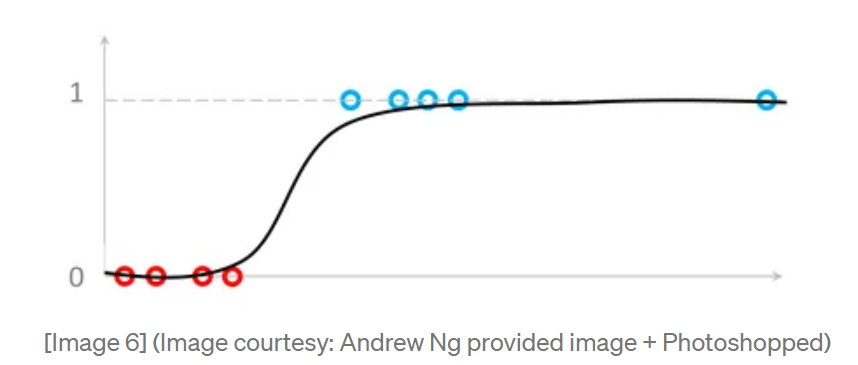

Source: https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

#### 3.3.1 Printing 10 predicted target features and evaluate the prediction
- Here we will print the predicted target feature value for the first 100 training examples based on training data

In [93]:
# calculate the prediction and threshold the value. If >= 0.5 its true
multiple_logisticreg_predictions_train = multiple_logisticreg.predict(X_train)

print("\nPredictions with logistic regression: \n")
actual_vs_predicted_multiplelogisticreg = pd.concat([y_train, pd.DataFrame(multiple_logisticreg_predictions_train, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelogisticreg.head(10))


Predictions with logistic regression: 

   death_yn  Predicted
0         0          0
1         1          1
2         1          1
3         0          1
4         0          0
5         1          1
6         0          0
7         0          0
8         0          0
9         1          1


#### 3.3.2 Evaluation metrics based on training data
- We will print the classification evaluation measures computed on the training set (e.g. Accuracy, Confusion matrix, Precision, Recall, F1)
- We will discuss finding based on these measures

In [94]:
# Some more evaluation metrics.
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_logisticreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_logisticreg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, multiple_logisticreg_predictions_train))
print("======================================================")

==================== Train Data =======================
Accuracy:  0.9335145141596755
Confusion matrix: 
 [[18505   981]
 [  707  5196]]
Classification report:
                precision    recall  f1-score   support

           0       0.96      0.95      0.96     19486
           1       0.84      0.88      0.86      5903

    accuracy                           0.93     25389
   macro avg       0.90      0.91      0.91     25389
weighted avg       0.93      0.93      0.93     25389



Interpretation of results
- Accuracy: This is a measure of the correctness of the model's predictions. In this example, the accuracy rate is 0.9335, which means that on the training data, the model correctly predicted about 93.35% of the samples.

- Confusion matrix: The confusion matrix shows the relationship between model predictions and actual values. In this example:

    - True Positives (True Positives, TP): 5196, indicating the number of samples that are actually 1 and predicted to be 1.
    - True Negatives (TN): 18505, indicating the number of samples that are actually 0 and predicted to be 0.
    - False Positives (False Positives, FP): 981, indicating the number of samples that are actually 0 but predicted to be 1.
    - False Negatives (FN): 707, indicating the number of samples that are actually 1 but predicted to be 0.

- Precision: Indicates the proportion of the samples that are predicted to be positive and are actually positive. In this example, class 0 has a precision of 0.96 and class 1 has a precision of 0.84. It shows that about 96% and 84% of the samples predicted as class 0 and class 1 are accurately predicted.

- Recall: Indicates the proportion of the samples that are actually positive examples that are predicted to be positive examples. In this example, class 0 has a recall of 0.95 and class 1 has a recall of 0.88. It shows that about 95% and 88% of the samples that are actually class 0 and class 1 are correctly predicted.

- F1 score: The harmonic mean of precision and recall, which is used to measure the overall performance of the model while considering precision and recall. In this example, the F1 score for class 0 is 0.96 and the F1 score for class 1 is 0.86. A high F1 score indicates that the model performs relatively well on both categories.


Summary
- These values seem reasonable
- Accuracy is in line with and a little better than the linear regression model
- The logistic model is also a little better at predicting the positive class.

#### 3.4.1 Evaluate the model using the hold-out (30% examples) test set
- These results from the test data will be compared the results from the training data.
- In addition they will be compared to the results from a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset).

Printing Actual death_yn vs predicted based on test data

In [95]:
# calculate the prediction and threshold the value. If >= 0.5 its true
multiple_logisticreg_predictions_test = multiple_logisticreg.predict(X_test)

print("\nPredictions with logistic regression: \n")
actual_vs_predicted_multiplelogisticreg = pd.concat([y_test, pd.DataFrame(multiple_logisticreg_predictions_test, columns=['Predicted'])], axis=1)
print(actual_vs_predicted_multiplelogisticreg.head(20))


Predictions with logistic regression: 

    death_yn  Predicted
0          0          0
1          0          0
2          0          0
3          1          0
4          1          1
5          1          1
6          0          0
7          0          0
8          0          0
9          1          1
10         1          1
11         1          1
12         1          1
13         1          1
14         0          0
15         0          0
16         0          0
17         0          0
18         0          0
19         0          0


#### 3.4.2Evaluation based on test data

In [96]:
# Some more evaluation metrics.
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, multiple_logisticreg_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, multiple_logisticreg_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, multiple_logisticreg_predictions_test))
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, multiple_logisticreg_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, multiple_logisticreg_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, multiple_logisticreg_predictions_train))
print("======================================================")

==================== Test Data =======================
Accuracy:  0.9307968017645437
Confusion matrix: 
 [[7910  434]
 [ 319 2218]]
Classification report:
                precision    recall  f1-score   support

           0       0.96      0.95      0.95      8344
           1       0.84      0.87      0.85      2537

    accuracy                           0.93     10881
   macro avg       0.90      0.91      0.90     10881
weighted avg       0.93      0.93      0.93     10881

==================== Train Data =======================
Accuracy:  0.9335145141596755
Confusion matrix: 
 [[18505   981]
 [  707  5196]]
Classification report:
                precision    recall  f1-score   support

           0       0.96      0.95      0.96     19486
           1       0.84      0.88      0.86      5903

    accuracy                           0.93     25389
   macro avg       0.90      0.91      0.91     25389
weighted avg       0.93      0.93      0.93     25389



Interpretation of test results and comparison with training results 
- Accuracy
    - On the test data, the accuracy of the model is 0.9308, which is similar to the accuracy of 0.9335 on the training data. This shows that the prediction accuracy of the model on the test data is comparable to that on the training data. 
- Precision
    - The precision score for predicting the positive case maintain the same, and hasn't changed.
    - The precision score for predicting the negative case maintain the same, and hasn't changed.
- Recall
    - The recall score for predicting the positive case has reduced from 88% to 87%.
    - The recall score for predicting the negative case maintain the same, and hasn't changed.
- F1
    - The f1 score for predicting the positive case has reduced from 86% to 85%.
    - The f1 score for predicting the negative case has reduced from 96% to 95%.

Summary
- **By comparing the test and training data results, we can see that the logistic regression model performs similarly on the test and training data, and there is no over-fitting phenomena. This means that the model can generalize better to unknown inputs and make more accurate predictions in actual situations.**
- These values see reasonable
- The accuracy level have dropped a little which is normal as we are testing the model on data it has not see before
- This is a good sign that the model is generalizing
- More comparisons need to be made and this is where cross validation steps in

#### 3.4.3 Cross validation
We will first create function to perform 10 fold cross validation and store results into dataframe
- This will be used to simplify further analysis the dataset, looking at accuracy, precision, recall, f1.

**Cross Validation is a method used in logistic regression to assess the model's performance and generalization capabilities. The basic goal of cross-validation is to minimize overfitting and enhance the model's predicting ability on unknown data.**

In logistic regression, the significance of cross-validation is mainly reflected in the following aspects:

- Model evaluation: By training and evaluating the model multiple times on different training sets and test sets, the performance of the model can be evaluated more accurately and the bias caused by a single data division can be reduced.

- Generalization ability: Cross-validation can evaluate the predictive ability of the model on unseen data by training and testing on different subsets. This helps us choose models that generalize better to new data.

- Avoid overfitting: Cross-validation can help us find out if the model is overfitting. If the model performs well on the training data, but poorly on the test data, it may mean that the model is overfitting the training data. By adjusting the parameters of the model or using regularization methods, we can mitigate overfitting.

- Parameter tuning: Through cross-validation, we can tune the model parameters on multiple training sets and test sets to find the optimal parameter combination. This helps to improve the predictive accuracy of the model in practical applications.

The following are the major steps:

1. Split the original dataset into N mutually exclusive subgroups.
2. One of the N subsets is chosen as the test set for each iteration, while the remaining N-1 subsets are merged as the training set.
3. Train the model on the training set before testing it on the test set. On the test set, record the model's performance indicators (such as accuracy, precision, recall, and so on).
4. Repeat steps 2 and 3 N times, using a different subset as the test set each time.
5. As a measure of model performance, compute the average performance metric across N iterations.



In [97]:
def cross_val_LogReg_DF(X,y):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    logRegResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']

    for metric in test_metrics:
        # generate test results
        result = cross_val_score(LogisticRegression(), X, y, scoring=metric, cv=10)
        # store result in dict
        logRegResults[metric] = result.mean()
        
    # create dataframe with results
    LogRegDF = pd.DataFrame.from_dict(logRegResults, orient='index', columns=['Logistic_Regression'])
    
    return LogRegDF

Preform 10 fold cross validation using cross_val_LogReg_DF function
- Results summarised below

In [98]:
logRegDF = cross_val_LogReg_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
logRegDF

Mean results from 10 fold cross validation are:


,Logistic_Regression
accuracy,0.931569
precision,0.838441
recall,0.874526
f1,0.856058


These results are in line with the previous results. We have taken the mean of 10 sets of results. 

#### Notice:

*Cross Validation itself is just a model evaluation method to measure the performance of the model on different data sets. It cannot directly change the parameters of the logistic regression model. However, cross-validation can be used in conjunction with parameter tuning methods, such as Grid Search or Randomized Search, to help us find the optimal combination of parameters.*

## (4) Random Forest Model

### 4.1 Train a random forest model using only the descriptive features selected from part 1 above 
- Random Forests: Random forests are an ensemble learning method that is built based on multiple decision trees. By voting or averaging the predictions of all decision trees, random forests are able to obtain more accurate and stable predictions. Random forests can be applied to both classification and regression tasks.

- A random forest model will now be trained on our test data. 
- We use the RandomForestClassifier() function. 
- The random state will be set to 1 to allow the results to be repeated

In [99]:
# Train RF with 100 trees
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features='auto', oob_score=True, random_state=1)


- "rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)": Initialize a random forest classifier object. The main parameters include:

- "n_estimators=100": Set the number of decision trees in the forest to 100. Increasing the number of trees can improve the performance of the model, but may also increase computation time.

- "max_features='auto'": The maximum number of features to consider for each split. Set to 'auto' to use sqrt(n_features), which is the square root of the number of features.

- "oob_score=True": Indicates whether to use Out-of-Bag estimation to evaluate the generalization performance of the model. Out-of-bag estimation uses samples that were not included in a decision tree's training set (that is, out-of-bag samples) to evaluate the performance of that decision tree. This can be used as a method of cross-validation.

- "random_state=1": Sets the seed of the random number generator to ensure that the results are repeatable each time it is run.

- "rfc.fit(X_train, y_train)": Fit (train) a random forest classifier using the training data (X_train and y_train). X_train represents the input feature data, and y_train represents the corresponding target category.

### 4.2 Understanding the Random Forest model
We will now try to understand how this random forest model works
- We will first start by trying to understand a decision tree 
- A random forest is made up of an ensemble/collection of decision trees
- **Decision tree**
    - A decision tree is a set of if-then-else rules based on splitting the data based on specific features
    - The decision on which feature to split on is based on the information gain (Gini index).
    - **Research**
    
        - Gini(D) = 1 - Σ (p_i)^2

        - Among them, D represents a data set, and p_i represents the proportion of samples of the i class in the data set. In the binary classification problem, there are only two categories (category A and category B), the calculation formula of Gini index is simplified as:

        - Gini(D) = 1 - (p_A)^2 - (p_B)^2

        - The value range of the Gini index is from 0 to 1. When there is only one type of sample in the data set, the Gini index is 0, indicating the highest purity of the data set. When the proportion of each type of sample in the data set is equal, the Gini index reaches the maximum value, indicating the lowest purity of the data set.
        
    - The tree will always split on the feature that gives the highest information gain
    - The feature with the highest information gain will sit at the root of each decision tree
    - Each decision tree will be a single prediction
- **Random Forest** 
    - The random forest is made up of a number of decision trees
    - The output of the random forest is base on the majority output of all decision trees combined
    - This gives reliable results but can be hard to interpret
    - The random forest will keep track of the importance of features in terms of information gain, which we will see
    - **Pros**:

    - High accuracy: By integrating the prediction results of multiple decision trees, random forests can usually achieve higher accuracy than individual decision trees.

    - Anti-overfitting: Since the training data and feature selection of each tree in the random forest are random, this increases the diversity of the model and reduces the risk of overfitting.

    - Can handle high-dimensional data: Random forest can handle data sets with a large number of features, and can evaluate the importance of each feature to help feature selection.

    - Can handle class imbalance: Random forests can handle class imbalance by setting different weights for different class samples, or using sample balance strategies (such as oversampling or undersampling).

    - Parallel Computing: Decision trees in random forests can be trained in parallel, which speeds up model training.

    - **Cons**:

    - Difficult to interpret: Although a single decision tree has good interpretability, the random forest model consists of multiple decision trees, and the overall model is poorly interpretable.

    - Training and prediction speed: Although it can be computed in parallel, the random forest contains multiple decision trees, which makes the training and prediction process potentially slower than a single decision tree.

    - Memory consumption: Each decision tree in random forest needs to be stored in memory, which may lead to high memory consumption when the number and depth of trees is large.


We will now look at an example of a single decision tree to get a better understanding

####  4.2.1  Train Decision tree
We will train 2 decision trees, with the same test data 
- One with max_depth=4 and the other max_depth=10
- Max depth determines how deep a decision tree can go before it must give an answer

In [100]:
dtc4 = DecisionTreeClassifier(max_depth=4, random_state=1)
dtc10 = DecisionTreeClassifier(max_depth=10, random_state=1)
dtc4.fit(X_train, y_train)
dtc10.fit(X_train, y_train)
print("Max depth 4: \n",dtc4)
print("Max depth 10: \n",dtc10)

Max depth 4: 
 DecisionTreeClassifier(max_depth=4, random_state=1)
Max depth 10: 
 DecisionTreeClassifier(max_depth=10, random_state=1)


####  4.2.2  Display Decision tree
We will create graph of each tree and store as an image

In [101]:
# create a Graphviz png
with open("DecisionTree4.dot", 'w') as f1:
    f1 = export_graphviz(dtc4, out_file=f1, feature_names=X_train.columns)
with open("DecisionTree10.dot", 'w') as f2:
    f2 = export_graphviz(dtc10, out_file=f2, feature_names=X_train.columns)
!dot -Gsize=50,50 -Tpng DecisionTree4.dot -o DecisionTree4.png
!dot -Gsize=350,50 -Tpng DecisionTree10.dot -o DecisionTree10.png


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.975208 to fit


We can see below the decision tree with max_depth=4
- We can see the root is old_person_No at value 0.5 - This splits the data best i.e. has the highest information gain
- For each split the the model selects the next best feature
- This continues until it reaches a leaf node where the data cannot be split anymore
- The output of this is the prediction
- We can see no one path below is resolved in 4 branches
    - All entries need additional branches to be resolved
    - This is possible when the maximum depth of the decision tree is set to 4, without achieving a clean data split. It depends on the characteristics and complexity of the dataset.
    - Reason:
        - Dataset complexity: For complex datasets, deeper trees may be required to achieve high classification purity. In this case, try increasing the maximum depth of the tree so that the tree can continue to split until a higher purity is reached.

        - Feature selection: If the features of the dataset do not distinguish the target variable well, even increasing the depth of the tree may not achieve a clean data split. In this case, you can try to add new features or optimize the selection and processing of existing features.
        - Insufficient or non-discriminative features: The current dataset may have insufficient features to accurately classify the target variable, or the features may not be discriminative enough for classification results. This may cause the decision tree to fail to find the right splitting condition to achieve a clean classification.

        - Insufficient depth of the tree: If the depth of the decision tree is limited, it may result in the tree not being able to fully learn the structure of the data. In this case, try increasing the maximum depth of the tree so that the tree can continue to split until a higher purity is reached. 
        

<img src="DecisionTree4.png">

Viewing a decision tree with maxdepth=10 shows how complicated this model becomes 
- A Random forests has 100 decision trees by default
- Each decision tree is given a slightly different view of the data
- When the maximum depth of the decision tree is set to 10, the appearance of pure data segmentation indicates that the model can better capture the structural information in the data under a deeper tree structure, thereby achieving higher classification purity. However, while improving model performance, care needs to be taken to prevent overfitting and ensure that the model generalizes well on new data.
- We can see one path below is resolved in 5 branches（seems to be the shallowest）
    - old_person_No <= 0.5 -> icu_yn_No <= 0.5 -> hosp_yn_Uknown <= 0.5 ->  symptom_status_Asymptomatic > 0.5 -> Region_Northeast <= 0.5 -> Resolved to TRUE
    - Conclusion:
        - Dataset complexity: Datasets may have certain complexity, requiring deeper decision trees to learn the structural information in the data. At a lower maximum depth (e.g. 4), the model may not capture enough information, leading to impure classification results. While increasing the maximum depth to 10, the model can continue to split to achieve higher classification purity, and in fact, increasing the maximum depth to 5 achieves very high classification purity.

        - Feature selection: Pure data appears at a depth of 5, indicating that the existing features may be sufficient for effective classification at this depth. This suggests that feature selection and processing may be applicable to this problem, especially when deeper tree structures are allowed.

        - Model generalization ability: When the depth is 10, the decision tree may learn more data structure information. However, it should be noted that increasing the depth of the tree may increase the risk of overfitting, resulting in a decrease in the generalization ability of the model on unknown data. Therefore, in practice, a trade-off between model complexity and generalization ability is required, and model performance is evaluated by methods such as cross-validation.

<img src="DecisionTree10.png">

#### 4.2.3 Interpretation of the random forest model
As mentioned above the random forest will keep track of the importance of features
- We can see from the dataframe below the results of this feature importance ranking
- The more important features are the features that the random forest has identified as having higher information gain
- This list is the combined result of the 100 decision trees that make up the random forest model
- This feature ranking will help us in our optimisation process going forward
    - What are the best features to keep?
        - We can discover the characteristics that have the biggest influence on model performance by looking at the feature importance rankings. These are the features that we normally wish to maintain since they give a lot of information about the target variable.

    - What features can be safely dropped without loosing information?
        - Features with low scores may have a limited influence on model performance in feature significance ranking. In certain circumstances, these elements can be removed to simplify the model and lower the computational cost. However, before eliminating features, the influence on model performance must be carefully analyzed to ensure that the model's generalization capacity is not jeopardized.

### - Research:
        
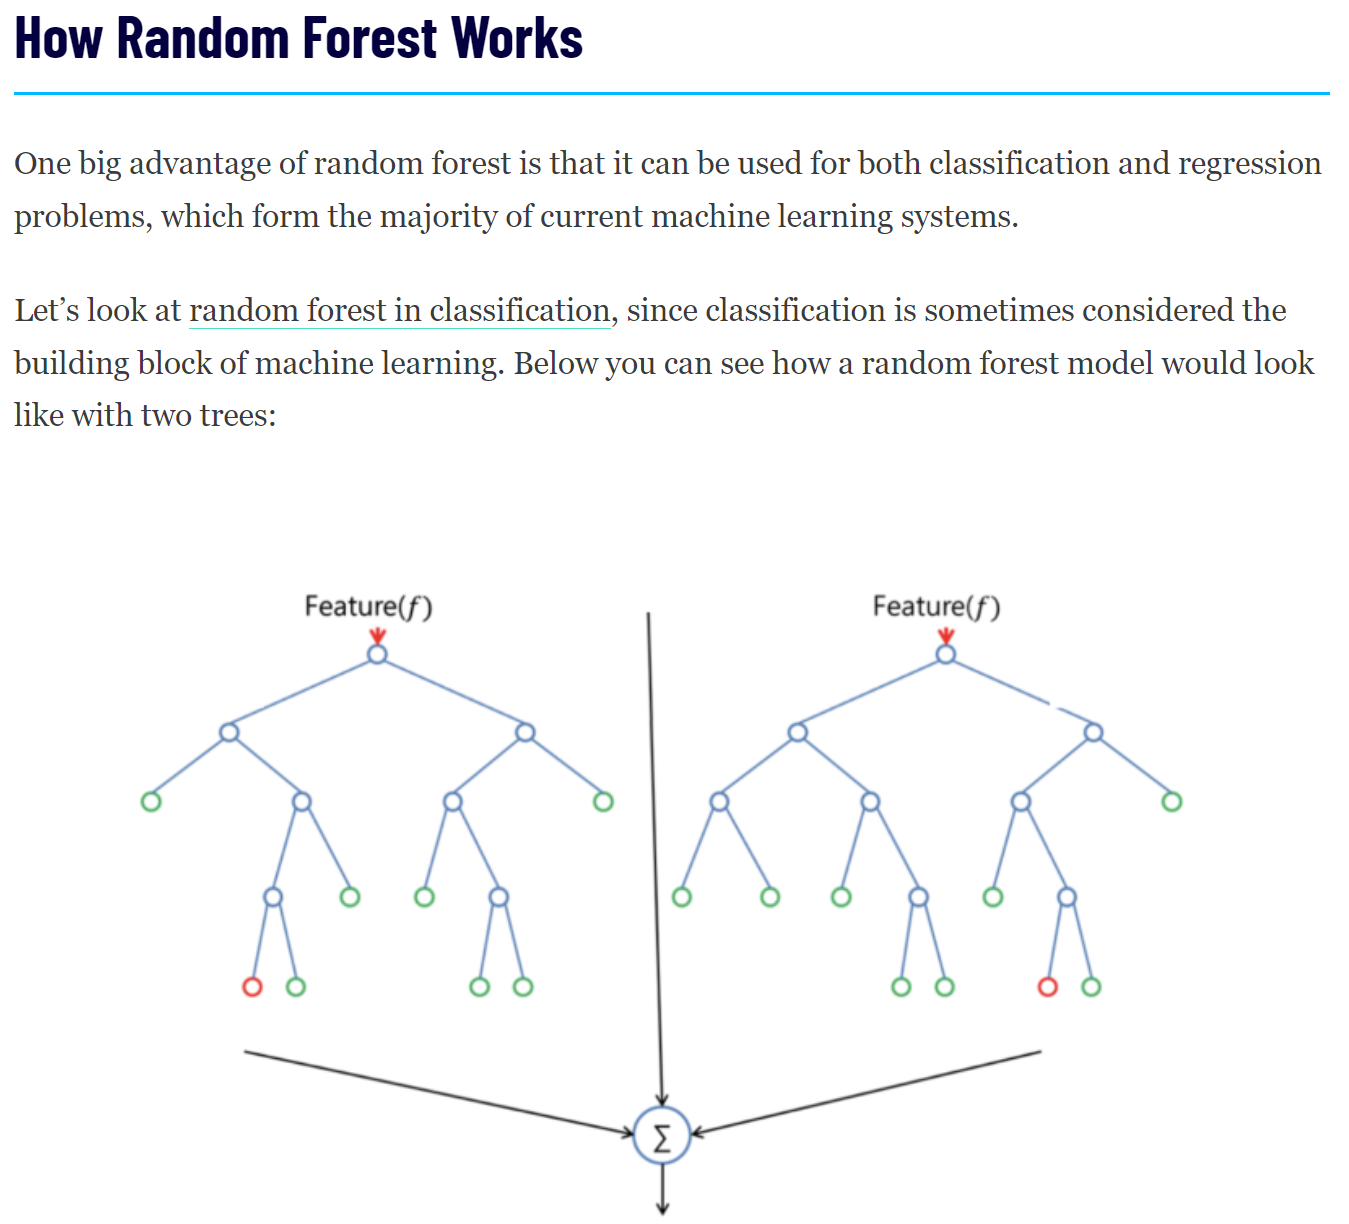

- **Hyperparameter tuning:** In addition to feature selection and feature significance analysis, model performance may be improved by adjusting the random forest's hyperparameters. These hyperparameters include the number of decision trees, the maximum depth, the pace of feature sampling, and so on. Grid search and random search are two strategies for optimizing hyperparameters.

- **Class Imbalance Issues:** Class imbalance issues can be handled when dealing with class unbalanced datasets by altering class weights, oversampling the minority class, or undersampling the dominant class. This improves the model's performance on unbalanced datasets.

- **Model evaluation index:** To evaluate model performance, a suitable evaluation index may be chosen based on the kind and needs of the issue. Accuracy, precision, recall, F1 score, AUC-ROC, and other assessment measures are extensively employed for classification tasks.

- **Ensemble Learning:** Random Forest is an ensemble learning strategy that increases model performance by merging numerous decision trees. Other integrated learning approaches, in addition to random forests, include AdaBoost, Gradient Boosting Trees (GBT), and others. Depending on the situation and your goals, you may select the best integrated learning technique.

- **Model interpretability:** Although the random forest model is not as obvious as a single decision tree, it may nevertheless give some model interpretability using approaches such as feature significance analysis and partial dependency plots (PDP). This assists in comprehending how the model develops predictions based on characteristics and how features interact with one another.

- **Data preprocessing and feature engineering:** Data may be preprocessed before being used in random forest, such as missing value processing, outlier processing, feature scaling, and so on. Furthermore, feature engineering may be used to increase model performance by adding additional features, encoding features, selecting features, and so on.


Source: https://builtin.com/data-science/random-forest-algorithm

In [102]:
importance = pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})
importance.sort_values('importance', ascending=False)

,feature,importance
42,old_person_No,1.609931e-01
43,old_person_Yes,1.313932e-01
24,hosp_yn_Yes,1.232336e-01
3,age_group_65+ years,9.407300e-02
25,icu_yn_No,6.389479e-02
26,icu_yn_Unknown,5.206180e-02
22,hosp_yn_No,5.003898e-02
1,age_group_18 to 49 years,4.703779e-02
23,hosp_yn_Unknown,2.454223e-02
38,region_West,1.754190e-02


### Small Conclusion:
- This table shows the feature importance ranking of a random forest model on a specific dataset. Each row represents a feature and its corresponding importance score. The higher the score, the greater the contribution of the feature to the model performance. Feature importance is calculated based on the information gain of all decision trees in the random forest.

- 'The old_person_No' and 'old_person_Yes' features have the highest importance scores, 0.160993 and 0.131393, respectively. This shows that these two features have high discriminative power in classification problems and contribute the most to the improvement of model performance.

- Different age groups in the 'age_group' feature also have high importance scores, especially 'age_group_65+ years' and 'age_group_18 to 49 years'. This means that age has a large influence on the predicted results.

- Features associated with hospital admission ('hosp_yn') and intensive care unit ('icu_yn') also had high importance scores, which may indicate that these features are strongly associated with the target variable.

- Relatively low feature importance scores (such as 'race_Native Hawaiian'/'Other Pacific Islander') indicate that these features contribute relatively little to model performance. In some cases, you might consider removing these features to simplify the model.

### 4.3.1 Printing 10 predicted target features and evaluate the prediction 
- Here we will print the predicted target feature value for the first 10 training examples. 

In [103]:
# Predicted class labels for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_train = rfc.predict(X_train)
df_true_vs_rfc_predicted = pd.DataFrame({'ActualClass': y_train, 'PredictedClass': rfc_predictions_train})
df_true_vs_rfc_predicted.head(10)

,ActualClass,PredictedClass
0,0,0
1,1,1
2,1,1
3,0,1
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,1,1


###  4.3.2 Evaluation metrics based on training data
- We will print the classification evaluation measures computed on the training set (e.g. Accuracy, Confusion matrix, Precision, Recall, F1)
- We will discuss finding based on these measures

In [104]:
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, rfc_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, rfc_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, rfc_predictions_train))

==================== Train Data =======================
Accuracy:  0.9599038953877663
Confusion matrix: 
 [[18790   696]
 [  322  5581]]
Classification report:
                precision    recall  f1-score   support

           0       0.98      0.96      0.97     19486
           1       0.89      0.95      0.92      5903

    accuracy                           0.96     25389
   macro avg       0.94      0.95      0.95     25389
weighted avg       0.96      0.96      0.96     25389



Interpretation of results
- Accuracy: 0.9599, indicating the proportion of samples correctly predicted by the model on the training data set to the total number of samples. The accuracy here is around 96%, indicating that the model is doing pretty well on the training data.
- Confusion matrix: 
    - 18790 in the first column of the first row indicates the number of samples that are actually category 0 and are predicted to be category 0;
    - 696 in the second column of the first row indicates the number of samples that are actually class 0 but are predicted as class 1;
    - 322 in the first column of the second row indicates the number of samples that are actually class 1 but are predicted as class 0;
    - 5581 in the second column of the second row indicates the number of samples that are actually class 1 and are predicted to be class 1.
    
    
#### Category 0:
- Accuracy rate: 0.98, which means that among the samples predicted as category 0, the proportion of actual category 0 is about 98%.
- Recall rate: 0.96, which means that among the samples that are actually class 0, the proportion that is correctly predicted as class 0 is about 96%.
- F1 score: 0.97, F1 score is the harmonic mean of precision and recall, which is used to evaluate the overall performance of the model in this category. The closer the value is to 1, the better the performance.
- Support: 19486, indicating the number of samples of category 0 in the training data set.


#### Category 1:
- Accuracy rate: 0.89, which means that among the samples predicted as category 1, the proportion of actual category 1 is about 89%.
- Recall rate: 0.95, which means that among the samples that are actually class 1, the proportion that is correctly predicted as class 1 is about 95%.
- F1 score: 0.92, used to evaluate the overall performance of the model on this category.
- Support: 5903, indicating the number of samples of category 1 in the training data set.

###  4.4.1 Evaluate the model using the hold-out (30% examples) test set
- These results from the test data will be compared the results from the training data.
- In addition they will be compared to the results from a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset).

Printing Actual death_yn vs predicted based on test data

In [105]:
# Predicted class labels for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_test = rfc.predict(X_test)
df_true_vs_rfc_predicted_test = pd.DataFrame({'ActualClass': y_test, 'PredictedClass': rfc_predictions_test})
df_true_vs_rfc_predicted_test.head(20)

,ActualClass,PredictedClass
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,0,0
7,0,0
8,0,0
9,1,1


#### 4.4.2 Evaluation metrics based on test data

In [106]:
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, rfc_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, rfc_predictions_test))
print("Classification report:\n ", metrics.classification_report(y_test, rfc_predictions_test))
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, rfc_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(y_train, rfc_predictions_train))
print("Classification report:\n ", metrics.classification_report(y_train, rfc_predictions_train))
print("======================================================")

==================== Test Data =======================
Accuracy:  0.94026284348865
Confusion matrix: 
 [[7957  387]
 [ 263 2274]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      0.95      0.96      8344
           1       0.85      0.90      0.87      2537

    accuracy                           0.94     10881
   macro avg       0.91      0.92      0.92     10881
weighted avg       0.94      0.94      0.94     10881

==================== Train Data =======================
Accuracy:  0.9599038953877663
Confusion matrix: 
 [[18790   696]
 [  322  5581]]
Classification report:
                precision    recall  f1-score   support

           0       0.98      0.96      0.97     19486
           1       0.89      0.95      0.92      5903

    accuracy                           0.96     25389
   macro avg       0.94      0.95      0.95     25389
weighted avg       0.96      0.96      0.96     25389



Interpretation of test results and comparison with training results 
- The model's generalization ability is good: the accuracy of the training data set and the test data set are comparable, showing that the model's performance on the training set can be well extended to unknown data, indicating that the model has a strong generalization ability.

- There is no noticeable overfitting: The model's performance on the training data set is comparable to its performance on the test data set, indicating that the model is not overfitting on the training data. Overfitting can lead to the model performing well on training data but badly on test data. This is not the case in this situation.

- Predictive performance in Category 1 is relatively underwhelming: Although the model performs well on both datasets, the accuracy on the test dataset (0.85) is somewhat lower than on the training dataset (0.89). This may suggest that the model is not reliably predicting class 1 in some circumstances and that additional tuning is required.

- Overall, our random forest model performs admirably on both the training and test datasets, and it is capable of high generalization. However, there is still space for improvement in the prediction performance for category 1, and you may try to optimize by adjusting model parameters or experimenting with various machine learning techniques.

- The scores seem reasonable and are in line with the other models test results

###  4.4.3 Cross validation
- We will preform cross validation and store the results in a dictionary for later use

In [107]:
def cross_val_RandomForest_DF(X,y, depth=None, estimators=100):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    # store results in dict
    RandomForestResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']

    for metric in test_metrics:
        # generate test results
        result = cross_val_score(RandomForestClassifier(n_estimators=estimators, max_features='auto', oob_score=True, random_state=1, max_depth=depth), X, y, scoring=metric, cv=10)
        # store result in dict
        RandomForestResults[metric] = result.mean()
    
    # create dataframe with results
    RandomForestDF = pd.DataFrame.from_dict(RandomForestResults, orient='index', columns=['Random_Forests'])

    return RandomForestDF

##### The results for Random Forests are summarized below

In [108]:
RandomForestDF = cross_val_RandomForest_DF(X,y)
print(f"Mean results from 10 fold cross validation are:")
RandomForestDF

Mean results from 10 fold cross validation are:


,Random_Forests
accuracy,0.941081
precision,0.849509
recall,0.907701
f1,0.877601


The results above are inline with expectation
#### Notice:
#### - 'cross_val_score' calculates the precision, recall and F1 score for each class based on the actual class labels, and then calculates a weighted average based on the number of samples in each class. The resulting results consider the performance of all category together, rather than targeting a specific category alone. Therefore, the 10-fold cross-validation results in the code you provided are based on weighted average performance metrics across all categories(both 0 and 1).


#### Conclusion:
- The model has good stability: the average result of 10-fold cross-validation is similar to the result of a single-division test data set, which means that the model can maintain good performance under different data divisions, indicating that the model has good stability .

- More reliable evaluation of model performance: Through 10-fold cross-validation, we evaluated the performance of the model on multiple different combinations of training sets and test sets, which made our evaluation of model performance more reliable and reliable.

- Verification of model generalization ability: Compared with the results of a single test data set, the results of 10-fold cross-validation further confirm that the model has better generalization ability and can maintain better performance even under different data divisions.

###  4.4.4 Out of bag accuracy
#### Research:
- Out of bag accuracy
    - When creating a random forest model, a technique called out-of-bag accuracy is utilized to assess model performance. Each underlying decision tree is educated using a bootstrap sampled data set in the random forest approach. Bootstrap sampling is a replacement-based sampling technique. After each sampling, the samples are changed, resulting in a loss of around one-third of the data when each tree is built.

    - Out-of-bag data are these unextracted data. We may determine the error for each decision tree by using the out-of-bag data for validation. Each data sample in the complete random forest may show up in the out-of-bag data of numerous decision trees. With the use of these decision trees, we can forecast the sample and determine the random forest's overall accuracy using fresh data.

    - Out-of-bag accuracy is convenient in that it eliminates the requirement for a separate validation set or cross-validation when assessing the performance of a random forest model. This enables us to fully utilize all of the data that is accessible, which is especially helpful when the amount of data is constrained. It is crucial to keep in mind, nevertheless, that only random forest models—not those of other kinds—have out-of-bag accuracy.

- This is the out of bag error estimate 
- It is an internal error estimate of a random forest as it is being constructed.
- It is used as an additional measure and should be line with the cross validation results
- This is generally expected to be the lowest

In [109]:
# compute the out-of-bag classification accuracy
rfc.oob_score_

0.9398952302178109

- For those data samples that were not used to train a decision tree (i.e., out-of-bag data), Random Forest's prediction accuracy on these samples is about 93.99%.


**This value is in line with the Cross validation results above**

## 5 Improving Predictive Models

### 5.1 Which model of the ones trained above performs better at predicting the target feature? 
- All models preform almost identical on the test dataset +/- 1%, Random_Forests performs best.
- Summary of the results so far can be seen below 
- Note these results are for a subset of the original features (data after cleaning),  i.e. In part 1 we dropped many of the low correlation features
    - In part 5.2 we will review the impact to the decisions taken in part 1, and conduct in-depth research.

In [110]:
ResultsDF = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF

,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.929722,0.931569,0.941081
precision,0.842454,0.838441,0.849509
recall,0.857142,0.874526,0.907701
f1,0.849597,0.856058,0.877601


### Result:
- From these metrics, the random forest model performed best in terms of accuracy, precision, recall and F1 score. Therefore, on this data set full of categorical features, the random forest model may be the best choice.

- For classification problems, a more suitable model is logistic regression (Logistic Regression). Logistic regression models output probabilistic values, which can be applied naturally to classification problems. In addition, the logistic regression model optimizes the loss function during training to make it more suitable for classification tasks. Therefore, for classification problems, logistic regression is generally recommended over linear regression.

- Furthermore, for this kind of dataset that mainly consists of categorical features, other types of models such as decision trees, random forests, or gradient boosting machines are more suitable. These models are more robust to outliers and non-linear relationships between features and may perform better in such cases.

###  Is the model more accurate than a simple model that always predicts the majority class
- We will compare our results above to a simple model which predicts for the majority class
- First we will get the breakdown of the test dataset and see which is the majority class

### Research:why we use a simple model??
- A simple baseline model is usually a basic, simplified forecasting method used for comparison with more complex models. In this problem, the simple baseline model always predicts the majority class (i.e. the class that occurs most often in the test set). The predictive performance of such models is often poor, but it provides us with a reference point from which to better evaluate the performance of other, more complex models.

- The main difference between simple baseline models and those more complex models is that simple baseline models completely ignore the input features and only make predictions based on the distribution of categories in the training set, while models such as linear regression, logistic regression, and random forests use input features and The relationship between the output targets is predicted.

In [111]:
death_count = y_test[y_test == 1].count()
survival_count = y_test[y_test == 0].count()
total = death_count+ survival_count
print(f'From original dataset: \t\tCount {total}')
print(f'Total number Death:\t {death_count}\t{round(death_count/len(y_test)*100,2)}%')
print(f'Total number Survival:\t {survival_count}\t{round(survival_count/len(y_test)*100,2)}%')

From original dataset: 		Count 10881
Total number Death:	 2537	23.32%
Total number Survival:	 8344	76.68%


- We can see the majority class is 0 or death_yn='No'(patient survival)
- We will now generate scores for predicting the majority class

In [112]:
# generate array of 10881 zeros (length of test dataset)
majority = np.zeros(10881)
# create dataframe 
df_majorityClass = pd.DataFrame(majority, columns=['prediction'])
# calculate scores of simple predictin vs actual
print("Accuracy: ", metrics.accuracy_score(y_test, df_majorityClass))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, df_majorityClass))
print("Classification report:\n ", metrics.classification_report(y_test, df_majorityClass))

Accuracy:  0.7668412829703152
Confusion matrix: 
 [[8344    0]
 [2537    0]]
Classification report:
                precision    recall  f1-score   support

           0       0.77      1.00      0.87      8344
           1       0.00      0.00      0.00      2537

    accuracy                           0.77     10881
   macro avg       0.38      0.50      0.43     10881
weighted avg       0.59      0.77      0.67     10881



### Interpretion:

- The code for this step is evaluating a simple baseline model that always predicts the majority class. The majority class here refers to the class that appears most frequently in the test set, that is, the value of the predicted target feature is 0 (ie survival).

- First, the code calculates the number and percentage of deaths (value 1) and survival (value 0) in the test set. Then, generate an array of zeros of the same length as the test dataset (all predicted as survival, i.e. majority class), store it in a data frame called df_majorityClass.

- Next, compare the performance of this simple majority-class prediction model with the actual test dataset using evaluation metrics such as accuracy_score, confusion_matrix, and classification_report. The purpose of this is to set a benchmark for subsequent more complex predictive models, so that we can more easily understand the performance of other models relative to this simple model.

- For predicting death outcome the simple model fails completely as expected
- For predicting the survival outcome the simple model fares much better but still worse than all the other models outlined above
    - The precision is the same as the accuracy(nearly 77%) in this case - i.e. how good is it at predicting 0
    - The recall is 100% as all of the actual 0 values were predicted 0
    - The f1 is between the precision and recall as it is a weighted average of the two

### Combined Conclusion:
*Is it more ccurate than a simple model that always predicts the majority class ? Yes*

- From the results given here, we can see that:

- The accuracy of the majority classifier is 0.7668, which means that it correctly predicted 76.68% of the samples, which is much lower than other classifiers such as linear regression(0.929722), logistic regression(0.931569), and random forest(0.941081). However, this accuracy is biased because it only predicts the main class and does not take other classes into account.

- For category 1, the precision, recall and F1 score of the majority classifier are all 0. This shows that it did not correctly predict any samples of class 1 at all.

- In contrast, other classifiers such as linear regression, logistic regression, and random forest perform better on these evaluation metrics. These models actually classify the data and have better performance in predicting class 1. This also explains why the majority classifier performs relatively poorly on metrics such as accuracy, precision, recall, and F1 score.

### 5.2 Compare Model performance using different feature subsets 

**Summarise your understanding of the problem and of your predictive modeling results so far. Can you think of any new ideas to improve the best model so far？？**
- I have used various predictive models (such as linear regression, logistic regression, decision trees, and random forests, etc.) and compared various evaluation metrics (such as accuracy, precision, recall, and F1 score, etc.) to determine the best Model. So far, random forests have performed relatively well.

- But because the characteristics I select are all fixed, there is no multidimensional comparison in the feature screening process, and certain other aspects are also not taken into account.
   - To further improve the performance of the best model, I would try the following strategies:
       - a. Feature selection: Carefully check the feature importance rankings and try to remove some less important features. This can reduce the complexity of the model and possibly improve the generalization ability of the model.

       - b. Feature Engineering: Create new features, which may be combinations or transformations of existing features. For example, you could try using multinomial features, interaction features, or converting categorical features to numerical features (such as target encodings).

       - c. Tuning model parameters: Perform a grid search or random search on the random forest model to find the best combination of hyperparameters. For example, try different numbers of decision trees, different maximum depths, and different feature subset sizes.

       - d. Try other models: You can try other more complex models, such as gradient boosting trees (such as XGBoost, LightGBM or CatBoost) or neural networks. These models may have more powerful representation learning capabilities to capture more complex patterns in the data.

       - e. Ensemble learning: Performance can be improved by combining predictions from multiple models. For example, you can try techniques like model fusion, bagging, boosting or stacking.

**Below I will focus on discussing aspects a) and c).**
   
#### 5.2.1 All features (Nothing Drop)
- We will now repeat the tests using all features (both continuous and categorical features)
- First we set up the dataframe using the original features

In [113]:
# dataframe with all features = original dataframe
df_all = pd.get_dummies(df_combined)
# set X,y
y = df_all["death_yn"]
X = df_all.drop(["death_yn"],1)
print("number of features incl dummies: ", len(X.columns))

number of features incl dummies:  1454


With the dataframe now setup we will generate new set of results based on all the features
- This operation is simplified as we have set up functions in part 2,3,4 to allow cross validated scores to be returned in dataframes 

In [114]:
# calculate Linear regression, logistic regression, random forest results again using all features
linRegDF = cross_val_LinReg_DF(X,y)
logRegDF = cross_val_LogReg_DF(X,y)
RandomForestDF = cross_val_RandomForest_DF(X,y)
# merge all 3 models into dataframe
ResultsDF_allFeatures = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF_allFeatures

,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.950630,0.959994,0.965784
precision,0.891591,0.909103,0.911885
recall,0.895969,0.920142,0.944313
f1,0.893714,0.914549,0.927785


**You can see the result above.**

#### 5.2.2 High correlation features only
- We will now repeat the tests using the high correlation features identified in part (1.2.3)
- Again we set up the dataframe but now we use the list of high_correlation_features_categorical only

In [115]:
df_high_corr = df_combined[high_correlation_features_categorical]
df_high_corr_dummies = pd.get_dummies(df_high_corr)
y = df_high_corr_dummies["death_yn"]
X = df_high_corr_dummies.drop(["death_yn"],1)
print("Number of features: ", len(X.columns))

Number of features:  35


In [116]:
# calculate Linear regression, logistic regression, random forest results again
linRegDF = cross_val_LinReg_DF(X,y)
logRegDF = cross_val_LogReg_DF(X,y)
RandomForestDF = cross_val_RandomForest_DF(X,y)
# merge all 3 models into dataframe
ResultsDF_HighCorrFeatures = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF_HighCorrFeatures

,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.929345,0.931569,0.941329
precision,0.841602,0.837207,0.841991
recall,0.856610,0.876540,0.920853
f1,0.848851,0.856377,0.879610


**You can see the result above.**

### 5.2.3 Comparison of feature set so far

In [117]:
print("\nScores using all features: 18 features (0 features dropped)")
print("===================================================================")
print(ResultsDF_allFeatures)
print("\nScores using subset of features: 14 features what I used in Part2,3,4 (4 features dropped - from part 1)")
print("===================================================================")
print(ResultsDF)
print("\nScores using high Correlation features only: 10 features (8 features dropped)")
print("===================================================================")
print(ResultsDF_HighCorrFeatures)


Scores using all features: 18 features (0 features dropped)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.950630             0.959994        0.965784
precision           0.891591             0.909103        0.911885
recall              0.895969             0.920142        0.944313
f1                  0.893714             0.914549        0.927785

Scores using subset of features: 14 features what I used in Part2,3,4 (4 features dropped - from part 1)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.929722             0.931569        0.941081
precision           0.842454             0.838441        0.849509
recall              0.857142             0.874526        0.907701
f1                  0.849597             0.856058        0.877601

Scores using high Correlation features only: 10 features (8 features dropped)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.929345

### Small Conclusion:
- Use all features (18 features):

    - Random Forest outperformed Linear Regression and Logistic Regression in terms of Accuracy, Precision, Recall and F1 Score.

- Using partial features (14 features, 4 features removed):

    - After removing some features, the performance of all models decreased. However, random forests still perform well on various evaluation metrics.

- Use only highly correlated features (10 features, 8 features removed):

    - On this subset, the performance of random forest improved slightly, while the performance of linear regression and logistic regression was relatively stable. However, Random Forest still outperforms other models on various metrics.

In general, random forest models outperform both linear and logistic regression on various feature subsets. After removing some less important features, the performance of Random Forest slightly decreased, but improved slightly when using highly relevant features. These results show that the random forest model has better generalization ability and robustness to feature selection. However, this also means that model performance may not be significantly improved by simply removing features.

### 5.2.4 Further optimisations
- There are two possible options for optimizing the linear and logistic regression models
    - Deriving new features - All of the derived features proposed in homework 1 performed poorly and so additional features will not be proposed.
    - Further reviewing the existing features to find the best combination - This has already been attempted 
- We will therefore focus in the random forest model to see what optimization is possible. We will look at the following:
    1. Find best performing Max_Depth of decision tree while keeping accuracy high - reduce potential for overfitting and speed up model 
    2. Find lowest number estimators while keeping accuracy high- reduce unnecessary estimators as will slow down the model
    3. Find best preforming list of features ranked by feature importance - As we know there are many feature that add little the the model. Removing them will help generalise the model
        - Results here can be applied to all models,
        - We ultimately use these settings to form an optimal model

#### 5.2.4.1 Optimise Max Depth
**Note: This calculation may take some time**

In [118]:
# dataframe with all features = original dataframe
df_all = pd.get_dummies(df_combined)
# set X,y
y = df_all["death_yn"]
X = df_all.drop(["death_yn"],1)

# initialised empty daraframe
RandomForest_Depth = pd.DataFrame()

# calculate cross val score incrementing max depth by 1 each iteration
# append results to dataframe
for i in range(1,11):
    df1 = cross_val_RandomForest_DF(X,y,i)
    df1.rename(columns={'Random_Forests':f'depth={i}'}, inplace=True)
    RandomForest_Depth = pd.concat([RandomForest_Depth, df1], axis=1)

# same calculation but use no max depth this time
no_max_depth = cross_val_RandomForest_DF(X,y)
no_max_depth.rename(columns={'Random_Forests':f'no_max_depth'}, inplace=True)
RandomForest_Depth = pd.concat([RandomForest_Depth, no_max_depth], axis=1)
RandomForest_Depth

,depth=1,depth=2,depth=3,depth=4,depth=5,depth=6,depth=7,depth=8,depth=9,depth=10,no_max_depth
accuracy,0.767301,0.767301,0.774469,0.809677,0.855032,0.881665,0.896030,0.920844,0.932561,0.942763,0.965784
precision,0.000000,0.000000,0.997872,0.982599,0.956297,0.936539,0.929520,0.923824,0.914734,0.901498,0.911885
recall,0.000000,0.000000,0.030924,0.186374,0.395972,0.527251,0.598460,0.719194,0.783886,0.846919,0.944313
f1,0.000000,0.000000,0.059324,0.308235,0.557771,0.673925,0.727507,0.808100,0.843648,0.873030,0.927785


#### Result:
- When **depth=10** ,the performance is relatively good.
- The model performs best when there is no limit on the maximum depth (no_max_depth). However, as the maximum depth increases, the computational complexity and training time of the model increase accordingly, thus requiring a trade-off between performance and computational cost.

- Considering that when the maximum depth is 10, the performance of various indicators is very close to the performance when there is no maximum depth limit, you can choose a model with a maximum depth of 10. This can not only ensure a high predictive performance, but also reduce the computational cost to a certain extent.

#### 5.2.4.2 Optimise Number of estimators
**Note: This calculation may take some time**

In [119]:
# dataframe with all features = original dataframe
df_all = pd.get_dummies(df_combined)
# set X,y
y = df_all["death_yn"]
X = df_all.drop(["death_yn"],1)

# initialised empty daraframe
RandomForest_Estimators = pd.DataFrame()

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

for item in n_estimators:
    df1 = cross_val_RandomForest_DF(X,y,estimators=item)
    df1.rename(columns={'Random_Forests':f'estimators={item}'}, inplace=True)
    RandomForest_Estimators = pd.concat([RandomForest_Estimators, df1], axis=1)

RandomForest_Estimators

,estimators=1,estimators=2,estimators=4,estimators=8,estimators=16,estimators=32,estimators=64,estimators=100,estimators=200
accuracy,0.938020,0.934381,0.952881,0.959912,0.962779,0.964268,0.965895,0.965784,0.966226
precision,0.860991,0.915577,0.916390,0.914512,0.911056,0.910363,0.912496,0.911885,0.912508
recall,0.875000,0.791114,0.877844,0.913270,0.931043,0.938981,0.944076,0.944313,0.945616
f1,0.867870,0.848708,0.896554,0.913809,0.920905,0.924422,0.927981,0.927785,0.928736


#### Result:
- When **estimators=64** ,the performance is relatively good.
- 
- The random forest model with 64 base learners performs fairly close to the model with 100 base learners in terms of accuracy, precision, recall, and F1-score. But in this case, 64 is not strictly "better" than 100, but relatively superior, because it consumes less computing resources and time while maintaining similar performance.

- We can see from the above dataframe that accuracy continues to improve with increasing number of estimators. I hoped to see the accuracy level off quickly but it does seem to continue to increase after 64. For the sake of keeping the model size manageable we will keep the number of estimators at the default of 64

- When training random forests, it is important to find a balance that minimizes computational resource and time consumption while maintaining good performance. If a model with 64 base learners already satisfies the project requirements in practical applications, it is reasonable to choose it instead of a model with 100 base learners.

#### 5.2.4.3 Optimise Number of features
- First calculate feature order of importance using all features

In [120]:
# dataframe with all features = original dataframe
df_all = pd.get_dummies(df_combined)
# set X,y
y = df_all["death_yn"]
X = df_all.drop(["death_yn"],1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 , test_size=0.3)

# Train RF with 100 trees
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X_train, y_train)
importance = pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})
importance.sort_values('importance', ascending=False, inplace=True)
importance.set_index('feature',1, inplace=True)
importance

,importance
feature,
hosp_yn_Yes,0.101953
old_person_No,0.092539
old_person_Yes,0.086613
age_group_65+ years,0.074060
icu_yn_No,0.048677
...,...
county_fips_code_55021.0,0.000000
county_fips_code_17049.0,0.000000
county_fips_code_19049.0,0.000000


In [121]:
importance.head(60)

,importance
feature,
hosp_yn_Yes,0.101953
old_person_No,0.092539
old_person_Yes,0.086613
age_group_65+ years,0.074060
icu_yn_No,0.048677
icu_yn_Unknown,0.046734
age_group_18 to 49 years,0.036594
hosp_yn_No,0.033799
res_state_CA,0.019828


- Next calculate the optimum number of features.
- There are 1454 features in total (more due to dummy features).
- We will only calculate the top 60 features to keep the execution time down.
- After the top 60 features, the importance still exists and gradually declines, but compared with the top 60 features, it effects less..
- We can see worst preforming features are the categorical(some county_fips_code), which was not expected.

**Note: This calculation may take some time**

In [122]:
# set up empty list to store features
list_features = []

# set up empty dataframe to store results
RandomForest_Features = pd.DataFrame()
count=0

# loop over 'importance' dataframe adding 1 feature per loop (will be the next most important feature)
# each loop calculates the score for the current number of features in the list_features
# Each loop appends result to RandomForest_Features dataframe
for index, row in importance.iterrows():
    # only calculate the top 60 features to keep runtime down
    if count < 60:
        list_features.append(index)
        X = df_all[list_features]
        df1 = cross_val_RandomForest_DF(X,y, depth=6)
        df1.rename(columns={'Random_Forests':f'features={len(list_features)}'}, inplace=True)
        RandomForest_Features = pd.concat([RandomForest_Features, df1], axis=1)
        count+=1
    else:
        break

# to display all columns    
#pd.set_option('display.max_columns', 50)
RandomForest_Features  

,features=1,features=2,features=3,features=4,features=5,features=6,features=7,features=8,features=9,features=10,...,features=51,features=52,features=53,features=54,features=55,features=56,features=57,features=58,features=59,features=60
accuracy,0.870802,0.872953,0.872953,0.872953,0.922305,0.921147,0.926413,0.926551,0.928757,0.928701,...,0.938076,0.940778,0.942542,0.940199,0.941935,0.940309,0.942184,0.938737,0.940502,0.938269
precision,0.822774,0.655528,0.655528,0.655528,0.774683,0.781142,0.790204,0.789898,0.791628,0.791703,...,0.837592,0.849483,0.853755,0.847113,0.848979,0.845956,0.855345,0.842789,0.851886,0.841933
recall,0.566825,0.957227,0.957227,0.957227,0.939573,0.920498,0.931161,0.932583,0.941943,0.941469,...,0.910664,0.906280,0.909005,0.906872,0.913152,0.909242,0.904739,0.905924,0.901185,0.904858
f1,0.671168,0.778135,0.778135,0.778135,0.849159,0.844439,0.854867,0.855290,0.860231,0.860076,...,0.872529,0.876874,0.880447,0.875909,0.879816,0.876390,0.879273,0.873148,0.875751,0.872155


In [123]:
pd.set_option('display.max_columns', None)
print(RandomForest_Features)
pd.reset_option('display.max_columns')

           features=1  features=2  features=3  features=4  features=5  \
accuracy     0.870802    0.872953    0.872953    0.872953    0.922305   
precision    0.822774    0.655528    0.655528    0.655528    0.774683   
recall       0.566825    0.957227    0.957227    0.957227    0.939573   
f1           0.671168    0.778135    0.778135    0.778135    0.849159   

           features=6  features=7  features=8  features=9  features=10  \
accuracy     0.921147    0.926413    0.926551    0.928757     0.928701   
precision    0.781142    0.790204    0.789898    0.791628     0.791703   
recall       0.920498    0.931161    0.932583    0.941943     0.941469   
f1           0.844439    0.854867    0.855290    0.860231     0.860076   

           features=11  features=12  features=13  features=14  features=15  \
accuracy      0.928453     0.927654     0.937331     0.937579     0.937414   
precision     0.790882     0.801103     0.839347     0.829318     0.843127   
recall        0.941706     0.

#### Result:
- When **features=28** ,the performance(94.5%) is relatively good.

- Here we see that after the top 28 features the accuracy of the model stabilises. Therefore was can trim the model to the optimum number of features i.e. 28 

- It is interesting to note that we achieve reasonable accuracy(87.0802%) using one feature only - hosp_yn_Yes. This had the highest correlation with the target from part 1 and also the highest importance in the random forest model.

- The top 10 features from the random forest importance list are also the top 10 correlated categorical features from part 1

We can now define our list of optimum features

In [124]:
# set list of optimum features
optimum_features = list_features[0:28]

### 5.2.5  Finally review performance of all models using what we have learned so far

#### - train three models on these features, and train random forests model on these optimized settings.
- Use optimum_features based on random forests feature importance evaluation
- For random forests model use max_depth=10 and number estimators=64


**random forests model**

**estimators=64**

**depth=10**

**features=28**

In [125]:
df_optimum_features =pd.get_dummies(df_combined)
# set X,y
y = df_optimum_features["death_yn"]
X = df_optimum_features[optimum_features]
print("Number of features: ", len(X.columns))

# calculate Linear regression, logistic regression, random forest results again
linRegDF = cross_val_LinReg_DF(X,y)
logRegDF = cross_val_LogReg_DF(X,y)
RandomForestDF = cross_val_RandomForest_DF(X,y,depth=10,estimators=64)
# merge all 3 models into dataframe
ResultsDF_optimum_features = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF_optimum_features

Number of features:  28


,Linear_Regression,Logistic_Regression,Random_Forests
accuracy,0.946595,0.945327,0.950565
precision,0.870457,0.873595,0.872022
recall,0.904160,0.894550,0.923223
f1,0.886920,0.883914,0.896845


####  Comparison of all

In [126]:
print("\nScores using all features: 18 features (0 features dropped)")
print("===================================================================")
print(ResultsDF_allFeatures)
print("\nScores using subset of features: 14 features (4 features dropped - from part 1)")
print("===================================================================")
print(ResultsDF)
print("\nScores using high Correlation features: 10 features (8 features dropped)")
print("===================================================================")
print(ResultsDF_HighCorrFeatures)
print("\nScores using optimum features: top 28 dummy features (due to dummy features， I choose top 28 features)")
print("===================================================================")
print(ResultsDF_optimum_features)


Scores using all features: 18 features (0 features dropped)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.950630             0.959994        0.965784
precision           0.891591             0.909103        0.911885
recall              0.895969             0.920142        0.944313
f1                  0.893714             0.914549        0.927785

Scores using subset of features: 14 features (4 features dropped - from part 1)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.929722             0.931569        0.941081
precision           0.842454             0.838441        0.849509
recall              0.857142             0.874526        0.907701
f1                  0.849597             0.856058        0.877601

Scores using high Correlation features: 10 features (8 features dropped)
           Linear_Regression  Logistic_Regression  Random_Forests
accuracy            0.929345             0.931569        0

### Small Conclusion:

- When using all features (28 features), the random forest model performed best, with higher accuracy, precision, recall and F1 scores than the linear regression and logistic regression models.

- When using a subset of features (14 features and top 28 dummy features), Random Forest still maintains relatively high performance. This shows that we can reduce the complexity of the model by reducing the number of features while still maintaining good performance.

- When only highly correlated features (10 features) are used, the performance of random forest drops slightly, but it still outperforms linear regression and logistic regression models. This means that we can further reduce the number of features, but there is a tradeoff between performance and model complexity.

- Random Forest was consistently the best model in all feature combinations tested. Therefore, random forests are an appropriate choice for this problem.

- This is a good result as we have trimmed the number of features and are achieving better scores all round. 
- We have also made some efficiency gains for the random forests model 
    - Finding an approiate depth (=10), which will in turn limit the chances of overfitting
    - Finding the optimum number of estimators (=64) 
- The logistic and random forest models preform almost the same +/-1% and both could be used. 

**- Using optimum features gives us a relatively rational and satisfactory result considering computer performance and computing time.**

### 5.2.6 Further work
Additional evaluation measures could be preformed on each model that were outside the scope of this homework
 
- Try other models: we can try other more complex models like gradient boosted trees or neural networks. These models may have more powerful representation learning capabilities to capture more complex patterns in the data.
    - Gradient Boosted Trees (GBT or GBM for short) is a machine learning algorithm that builds a stronger predictive model by combining multiple weak learners (usually decision trees). Gradient boosted trees use the Gradient Boosting method to ensemble the base learners. The core idea of gradient boosting is to iteratively train new weak learners, which are responsible for correcting the mistakes of previous weak learners.

    - In this way, gradient boosted trees are able to learn a very powerful model, gradually reducing the training error. Gradient boosted trees have shown high performance in many machine learning tasks, especially in regression and classification problems. However, they can require long training times and are very sensitive to the choice of hyperparameters. In order to achieve the best performance in practical applications, hyperparameter tuning is usually required.

- Ensemble Learning: Performance can be improved by combining predictions from multiple models. For example, we can try techniques like model fusion, bagging, boosting or stacking.

- Feature engineering: the creation of new features, which may be combinations or transformations of existing features. For example, we can try to use multinomial features, interaction features, or convert categorical features to numerical features (such as target encoding), carefully analyze the importance of features and the correlation between features when reducing the number of features. Retaining more representative and discriminative features helps improve model performance.

Also:
- Receiver Operating Characteristics (ROC) 
    - A Plot used to visualize how well our classifier is doing
    - Tells us how good the model is for distinguishing given classes
    - Plots False Positive Rate (FPR) against True Positive Rate (TPR)
- Area Under ROC Curve (AUC) 
    - Measures the quality of the ROC curve by calculating the total area under the ROC curve
    - The bigger the area covered, the better the model is at distinguishing the given classes

## Summary
- 3 predictive models have been evaluated in this notebook, but random trees have consistently performed the best on this problem with the highest accuracy and F1 score.
- While reducing the number of features affects model performance, using highly correlated features or an optimal subset of features still performs quite well.
- When selecting a feature subset, it needs to be weighed according to the requirements of application scenarios and performance indicators. For example, if recall is a concern, consider using the best combination of features.
- The majority of the features in the dataset have been found to have some impact on the target
- Although not significantly, a lot of optimizations have been done that have enhanced all models in some way. Additionally, they have reduced runtime and runtime memory use to a manageable level.
- The biggest effect is finding the optimised list of features as this can be applied to all models
- The linear, logistic and random forest models preform almost the same +/-1% and both could be used. 
- The logistic regression model is relatively lightweight and faster to train and predict. However, it is slightly lower than the random forest model in accuracy. Therefore, in practical applications, an appropriate model can be selected according to project requirements and limitations of computing resources. If you have higher requirements for calculation speed and efficiency, you can choose the logistic regression model; if you pursue higher accuracy, you can choose the random forest model.
- Compared to ensemble methods such as Random Forest and Gradient Boosted Trees, Linear Regression is indeed a more lightweight model. Linear regression is less computationally complex and faster to train. However, the predictive power of linear regression can be limited by nonlinear relationships in the data. In this case, more complex models such as random forests may perform better. Linear regression is very sensitive to outliers, which can bias the model's predictions. This is because linear regression tries to fit the overall trend of the data, but outliers may affect the fitted linear equation and thus affect the prediction results.

